In [1]:
import pandas as pd
import numpy as np
from ScoringPy import WoeAnalysis
from pathlib import Path
import warnings

warnings.filterwarnings('ignore')

In [2]:
current_path = Path.cwd()
processed_data_path = f"{current_path.parent}/ScoreCard/Data/ProcessedData/"


IV_dir = "ass"

In [3]:
data = pd.read_feather(processed_data_path + "ML_data.feather")

## Fill missing values

In [4]:
data["companion"].fillna("Unknown", inplace=True)

In [5]:
columns_with_low_unique_values = [col for col in data.columns if data[col].nunique() < 30]

## Split the data

In [6]:
X_train = data.drop(columns=['target'])
y_train = data['target']
woe_analysis = WoeAnalysis()



## Discrete Features

,contract_type,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,Revolving loans,29279,9.521285,1604.0,5.478329,27675.0,94.521671,6.461229,9.790014,-0.415543,NaN,NaN,0.015039,0.013833,True
1,Cash loans,278232,90.478715,23221.0,8.345913,255011.0,91.654087,93.538771,90.209986,0.036236,2.867584,0.451779,0.015039,0.001206,True


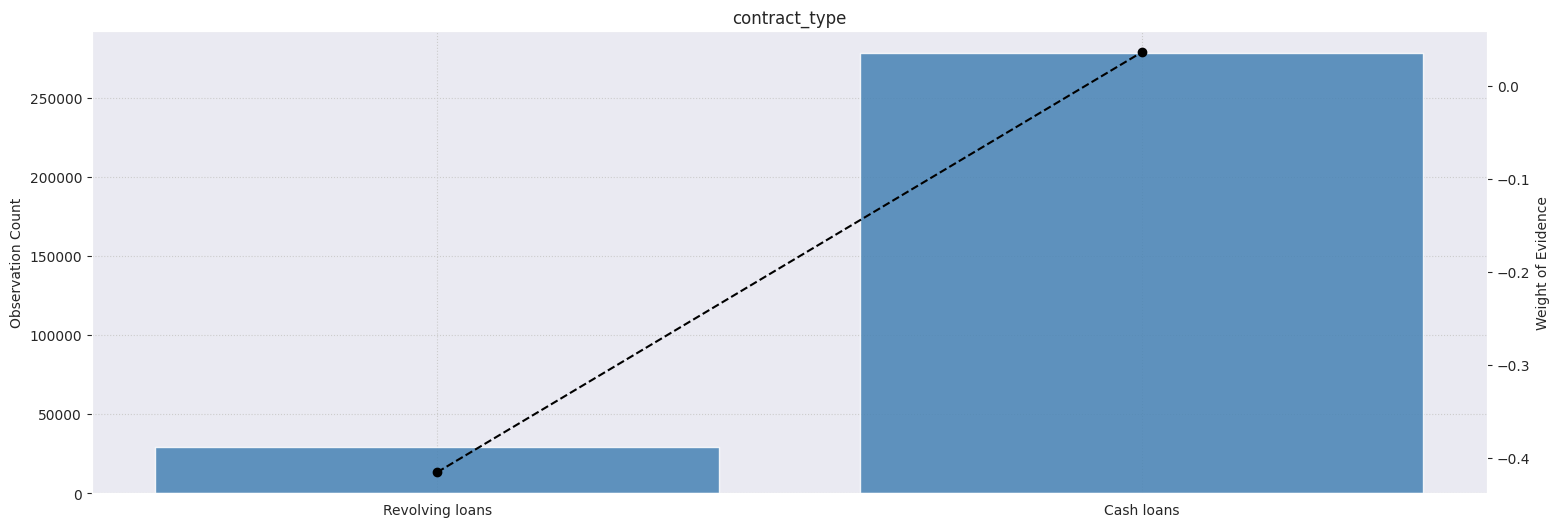

In [7]:
woe_analysis.discrete(column="contract_type", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,companion,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,Unknown,1292,0.420148,70.0,5.417957,1222.0,94.582043,0.281974,0.432282,-0.427263,NaN,NaN,0.002086,0.000642,True
1,Children,3267,1.062401,241.0,7.376798,3026.0,92.623202,0.970796,1.070446,-0.097714,1.958842,0.329549,0.002086,0.000097,True
2,Family,40149,13.056118,3009.0,7.494583,37140.0,92.505417,12.120846,13.138252,-0.080601,0.117784,0.017113,0.002086,0.000820,True
3,"Spouse, partner",11370,3.697429,895.0,7.871592,10475.0,92.128408,3.605237,3.705525,-0.027437,0.377009,0.053164,0.002086,0.000028,True
4,Unaccompanied,248526,80.818572,20337.0,8.183047,228189.0,91.816953,81.921450,80.721720,0.014753,0.311455,0.042191,0.002086,0.000177,True
5,Group of people,271,0.088127,23.0,8.487085,248.0,91.512915,0.092649,0.087730,0.054551,0.304038,0.039798,0.002086,0.000003,True
6,Other_A,866,0.281616,76.0,8.775982,790.0,91.224018,0.306143,0.279462,0.091186,0.288897,0.036635,0.002086,0.000024,True
7,Other_B,1770,0.575589,174.0,9.830508,1596.0,90.169492,0.700906,0.564584,0.216285,1.054527,0.125099,0.002086,0.000295,True


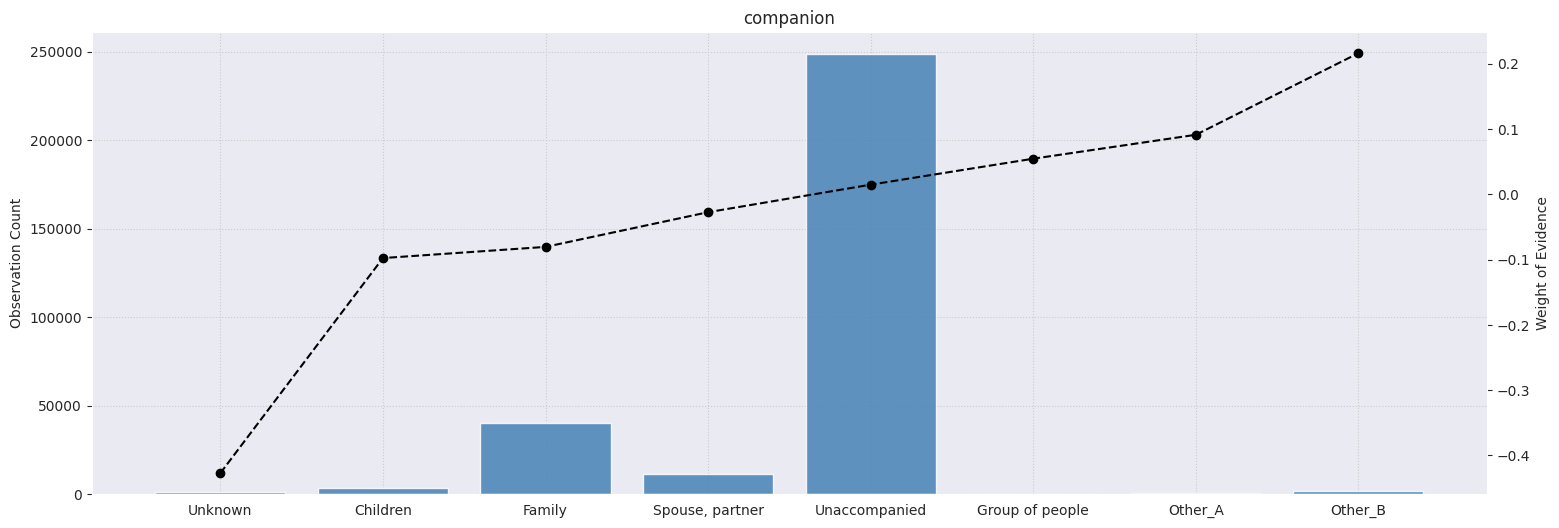

In [8]:
woe_analysis.discrete(column="companion", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,application_weekday,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,MONDAY,50714,16.491768,3934.0,7.757227,46780.0,92.242773,15.846928,16.548396,-0.043314,NaN,NaN,0.000677,0.000304,True
1,SATURDAY,33852,11.008387,2670.0,7.887274,31182.0,92.112726,10.755287,11.030613,-0.025277,0.130047,0.018037,0.000677,0.000070,True
2,SUNDAY,16181,5.261926,1283.0,7.929053,14898.0,92.070947,5.168177,5.270158,-0.019540,0.041779,0.005737,0.000677,0.000020,True
3,THURSDAY,50591,16.451769,4098.0,8.100255,46493.0,91.899745,16.507553,16.446870,0.003683,0.171202,0.023223,0.000677,0.000002,True
4,FRIDAY,50338,16.369496,4101.0,8.146927,46237.0,91.853073,16.519637,16.356311,0.009936,0.046672,0.006253,0.000677,0.000016,True
5,WEDNESDAY,51934,16.888502,4238.0,8.160357,47696.0,91.839643,17.071501,16.872431,0.011729,0.013431,0.001793,0.000677,0.000023,True
6,TUESDAY,53901,17.528153,4501.0,8.350494,49400.0,91.649506,18.130916,17.475220,0.036835,0.190137,0.025105,0.000677,0.000242,True


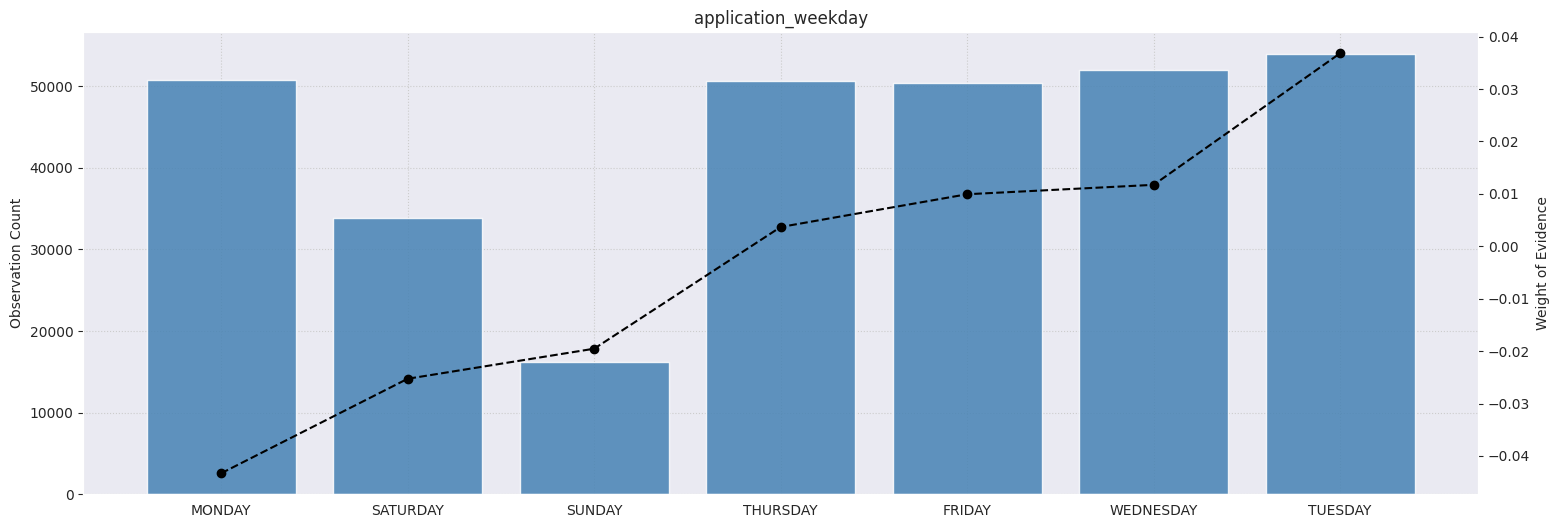

In [9]:
woe_analysis.discrete(column="application_weekday", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,application_hour,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,21,405,0.131703,25.0,6.172840,380.0,93.827160,0.100705,0.134425,-0.288810,NaN,NaN,0.01137,9.738622e-05,True
1,17,14900,4.845355,967.0,6.489933,13933.0,93.510067,3.895267,4.928790,-0.235331,0.317093,0.053479,0.01137,2.432205e-03,True
2,19,3848,1.251337,264.0,6.860707,3584.0,93.139293,1.063444,1.267838,-0.175800,0.370774,0.059531,0.01137,3.593244e-04,True
3,18,9049,2.942659,635.0,7.017350,8414.0,92.982650,2.557905,2.976447,-0.151542,0.156643,0.024258,0.01137,6.342658e-04,True
4,20,1196,0.388929,84.0,7.023411,1112.0,92.976589,0.338369,0.393369,-0.150613,0.006061,0.000929,0.01137,8.283835e-05,True
5,16,20385,6.629031,1521.0,7.461369,18864.0,92.538631,6.126888,6.673128,-0.085402,0.437957,0.065211,0.01137,4.664990e-04,True
6,15,24839,8.077435,1886.0,7.592898,22953.0,92.407102,7.597180,8.119610,-0.066505,0.131530,0.018897,0.01137,3.474414e-04,True
7,14,27682,9.001954,2189.0,7.907666,25493.0,92.092334,8.817724,9.018133,-0.022474,0.314767,0.044031,0.01137,4.503906e-05,True
8,10,37722,12.266878,3026.0,8.021844,34696.0,91.978156,12.189325,12.273689,-0.006897,0.114178,0.015576,0.01137,5.818774e-06,True
9,13,30959,10.067607,2485.0,8.026745,28474.0,91.973255,10.010070,10.072660,-0.006233,0.004901,0.000664,0.01137,3.901337e-06,True


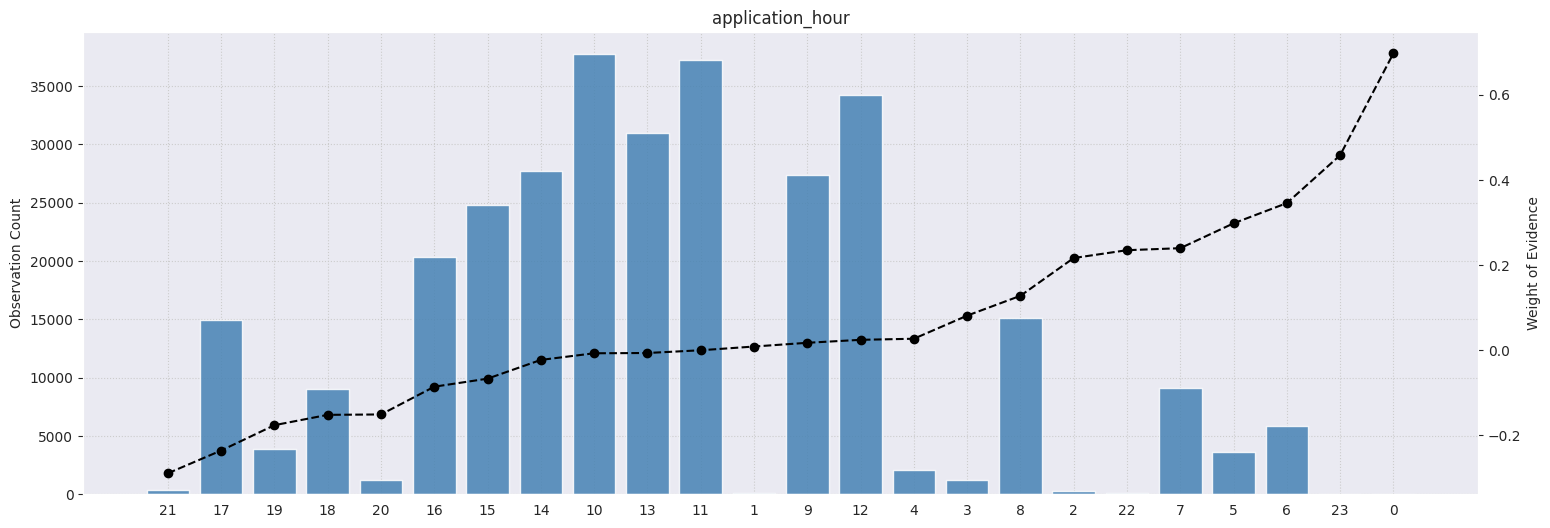

In [10]:
woe_analysis.discrete(column="application_hour", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,ext_source_count,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,3,109589,35.637424,7998.0,7.298178,101591.0,92.701822,32.217523,35.937754,-0.109278,NaN,NaN,0.010914,4.065391e-03,True
1,0,172,0.055933,14.0,8.139535,158.0,91.860465,0.056395,0.055892,0.008948,0.841357,0.118226,0.010914,4.495029e-08,True
2,2,161013,52.360078,13168.0,8.178222,147845.0,91.821778,53.043303,52.300079,0.014111,0.038687,0.005163,0.010914,1.048745e-04,True
3,1,36737,11.946565,3645.0,9.921877,33092.0,90.078123,14.682779,11.706275,0.226550,1.743655,0.212440,0.010914,6.743281e-03,True


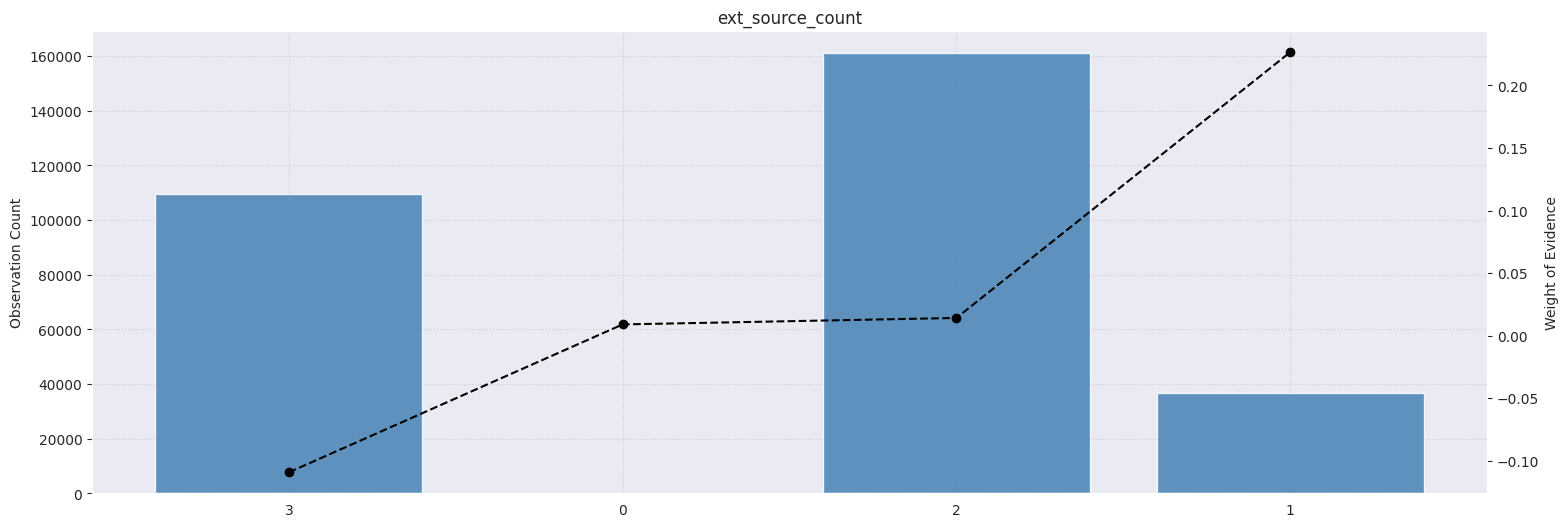

In [11]:
woe_analysis.discrete(column="ext_source_count", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,emp_phone,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,False,55386,18.011063,2991.0,5.400282,52395.0,94.599718,12.048338,18.534699,-0.430718,NaN,NaN,0.032907,0.027938,True
1,True,252125,81.988937,21834.0,8.659990,230291.0,91.340010,87.951662,81.465301,0.076610,3.259708,0.507328,0.032907,0.004969,True


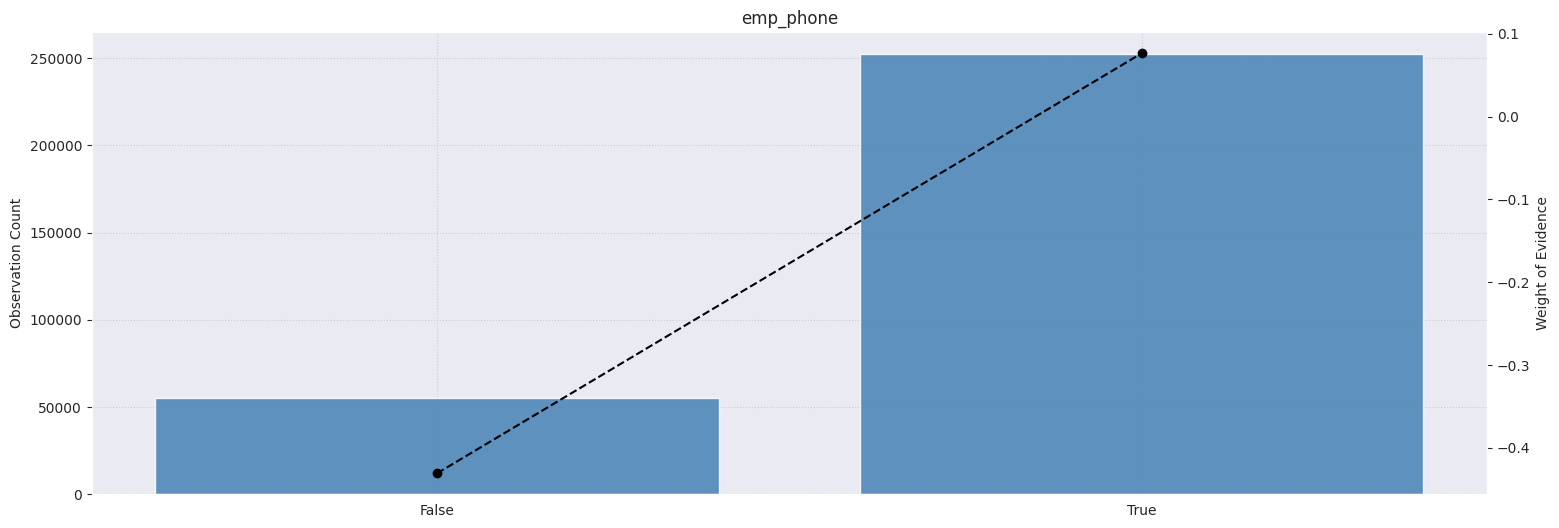

In [12]:
woe_analysis.discrete(column="emp_phone", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,work_phone,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,False,246203,80.063152,18921.0,7.685122,227282.0,92.314878,76.217523,80.400869,-0.053434,NaN,NaN,0.010329,0.002235,True
1,True,61308,19.936848,5904.0,9.630065,55404.0,90.369935,23.782477,19.599131,0.193464,1.944943,0.246897,0.010329,0.008093,True


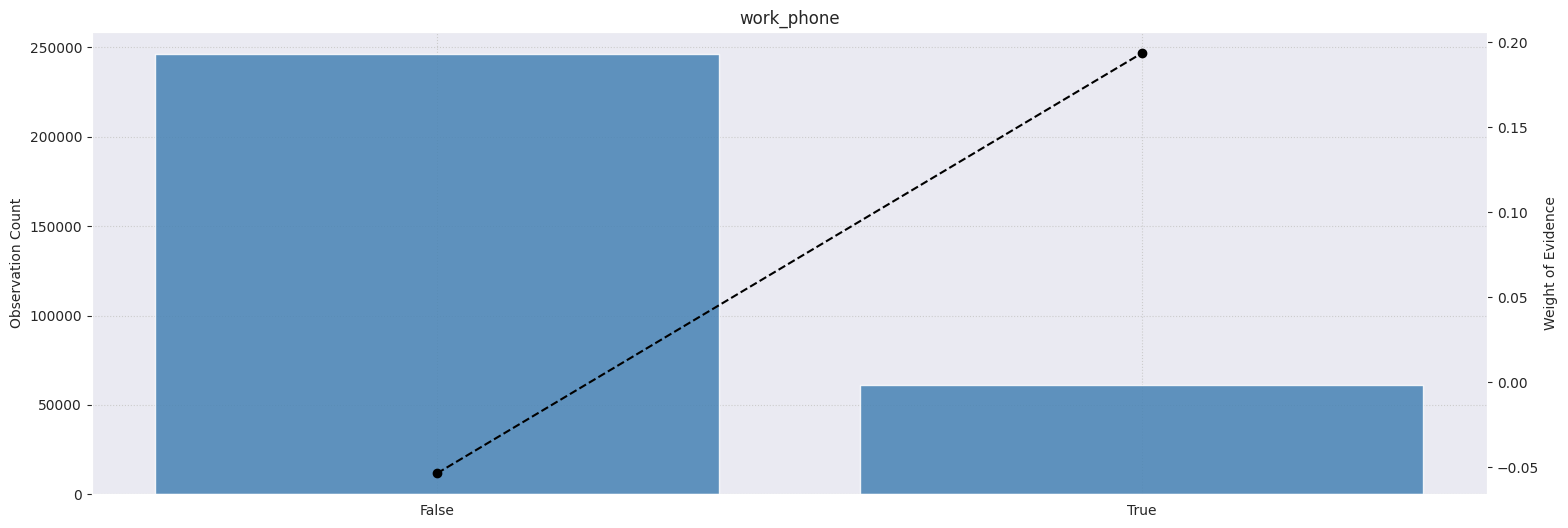

In [13]:
woe_analysis.discrete(column="work_phone", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,mobile_reachable,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,False,574,0.18666,45.0,7.839721,529.0,92.160279,0.181269,0.187133,-0.031840,NaN,NaN,0.000002,1.867295e-06,True
1,True,306937,99.81334,24780.0,8.073318,282157.0,91.926682,99.818731,99.812867,0.000059,0.233597,0.031899,0.000002,3.445636e-09,True


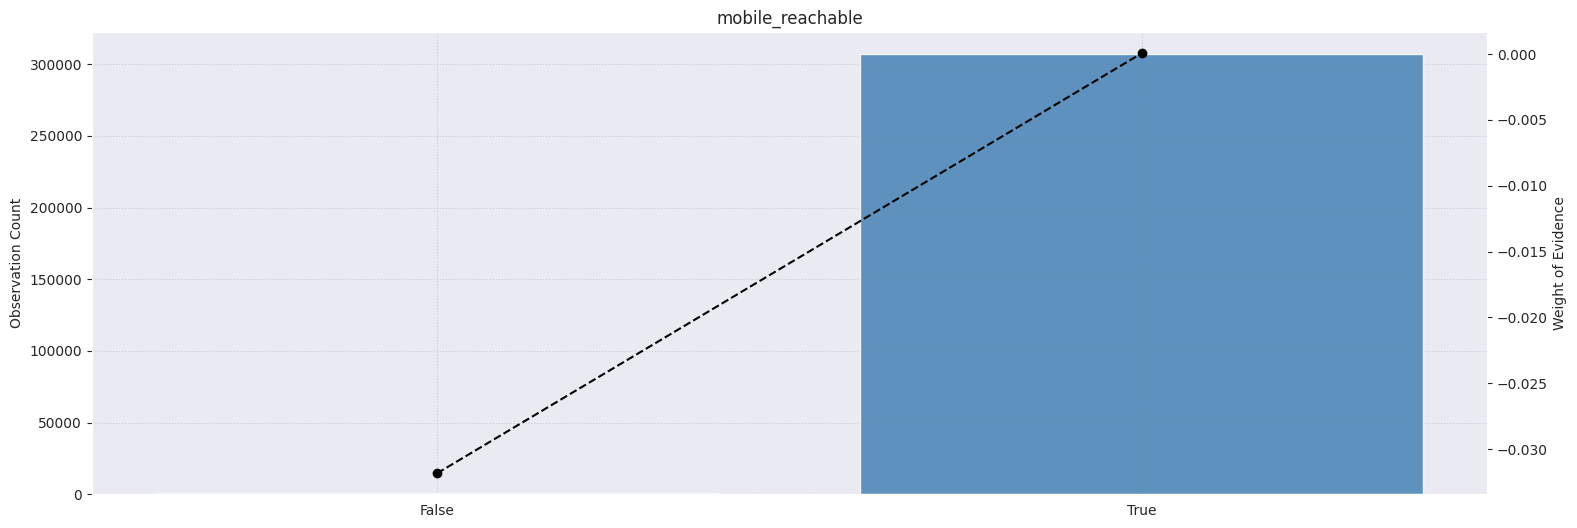

In [14]:
woe_analysis.discrete(column="mobile_reachable", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,phone,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,True,86431,28.106637,6081.0,7.035670,80350.0,92.964330,24.495468,28.423763,-0.148737,NaN,NaN,0.007942,0.005843,True
1,False,221080,71.893363,18744.0,8.478379,202336.0,91.521621,75.504532,71.576237,0.053430,1.442709,0.202167,0.007942,0.002099,True


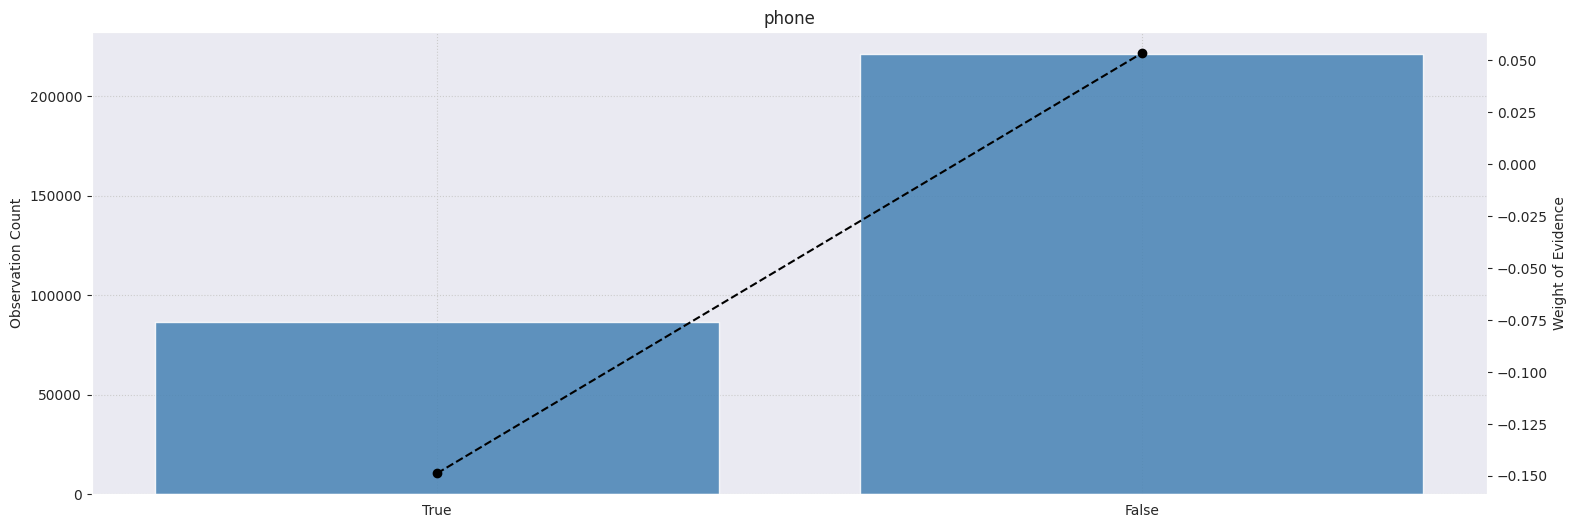

In [15]:
woe_analysis.discrete(column="phone", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,email,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,True,17442,5.671992,1374.0,7.877537,16068.0,92.122463,5.534743,5.684045,-0.026618,NaN,NaN,0.000042,0.000040,True
1,False,290069,94.328008,23451.0,8.084628,266618.0,91.915372,94.465257,94.315955,0.001582,0.207091,0.0282,0.000042,0.000002,True


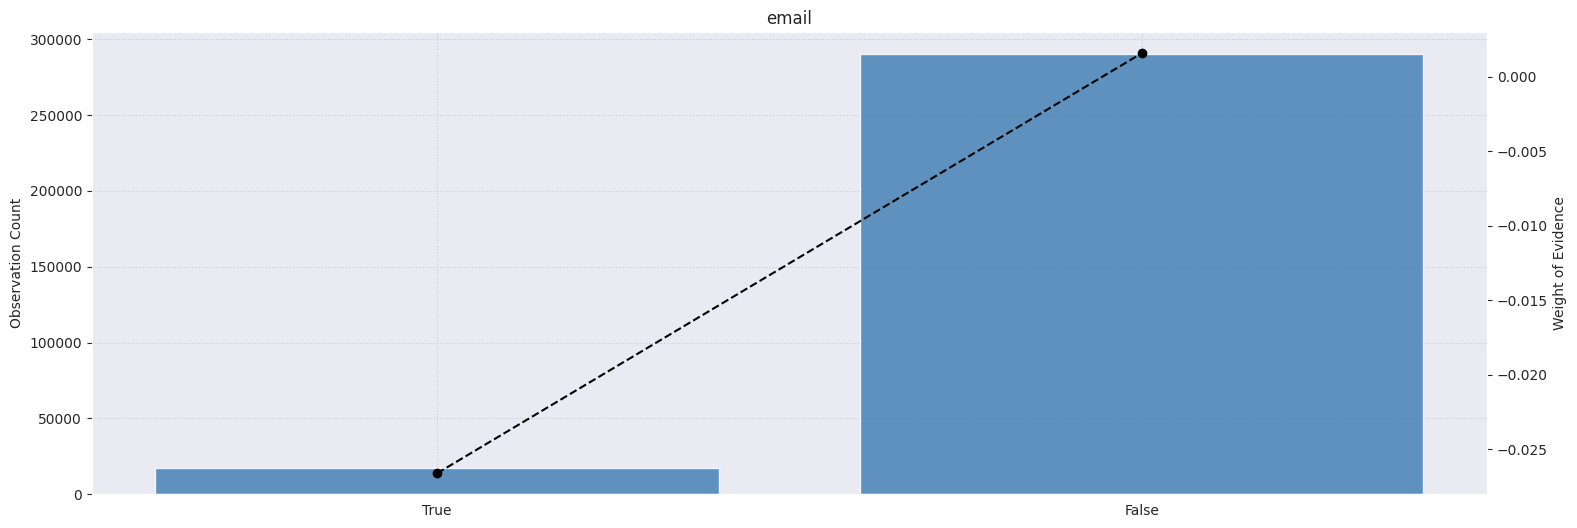

In [16]:
woe_analysis.discrete(column="email", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,doc_1,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,False,307498,99.995773,24821.0,8.071922,282677.0,91.928078,99.983887,99.996816,-0.000129,NaN,NaN,0.00021,1.671763e-08,True
1,True,13,0.004227,4.0,30.769231,9.0,69.230769,0.016113,0.003184,1.621555,22.697308,1.621685,0.00021,2.096516e-04,True


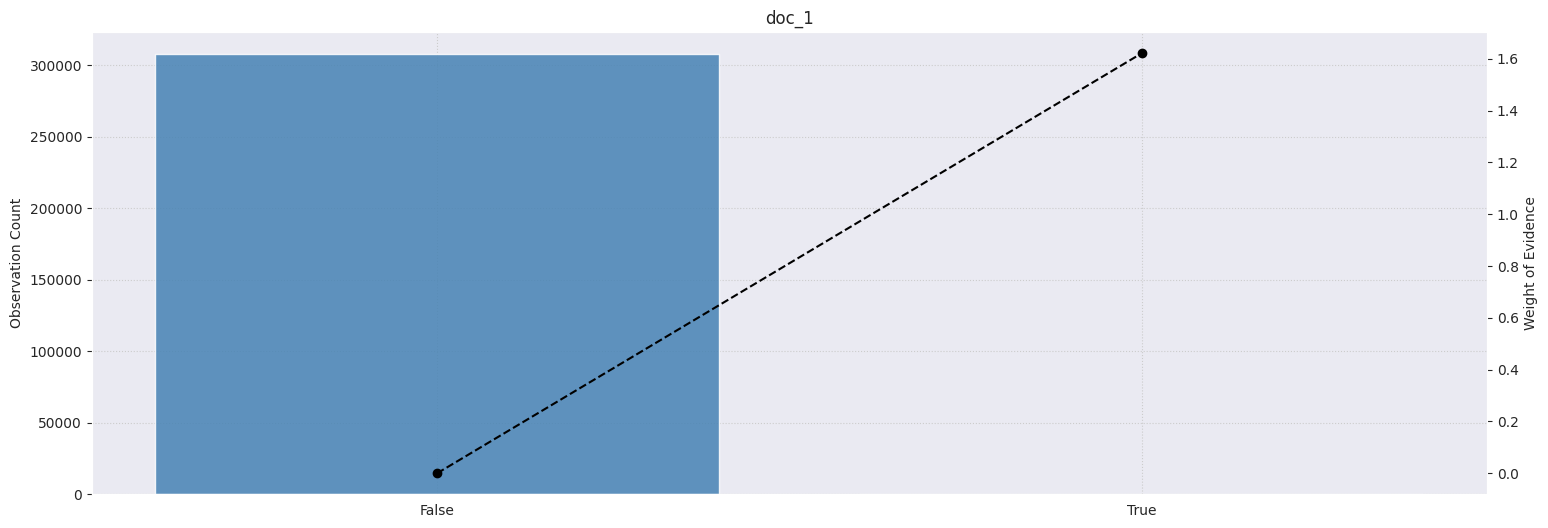

In [17]:
woe_analysis.discrete(column="doc_1", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,doc_2,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,False,89171,28.997662,5513.0,6.182503,83658.0,93.817497,22.207452,29.593966,-0.287143,NaN,NaN,0.028579,0.021210,True
1,True,218340,71.002338,19312.0,8.844921,199028.0,91.155079,77.792548,70.406034,0.099767,2.662417,0.386909,0.028579,0.007369,True


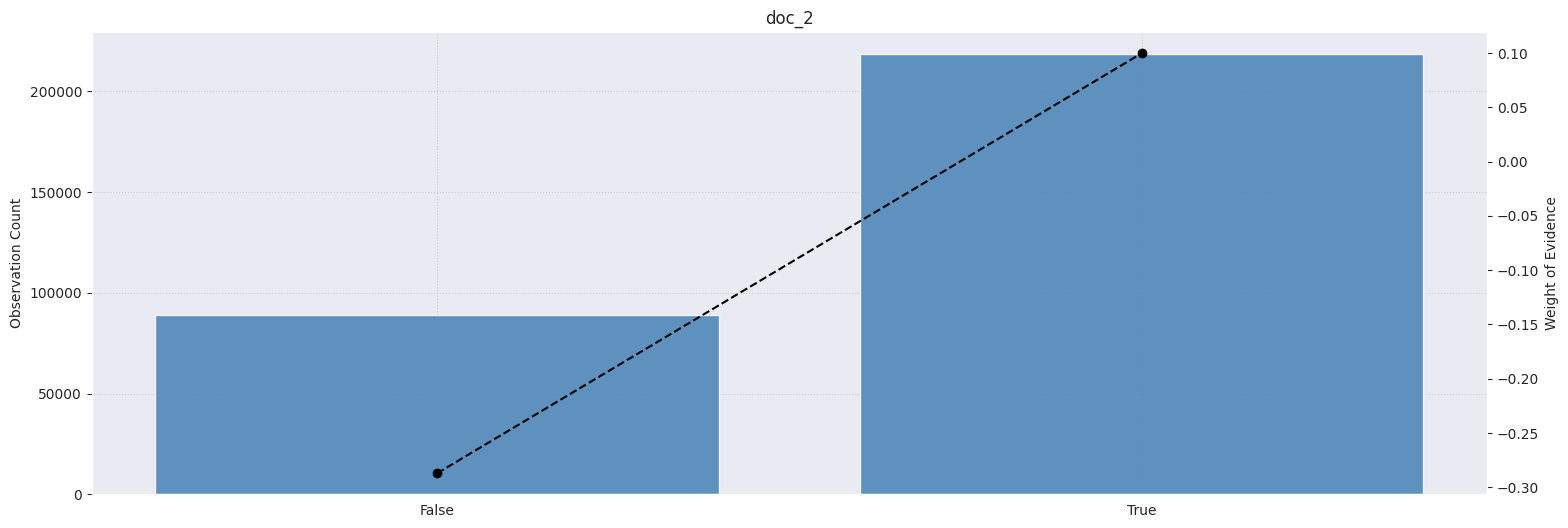

In [18]:
woe_analysis.discrete(column="doc_2", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,doc_3,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,True,25,0.00813,0.0,0.000000,25.0,100.000000,0.0,0.008844,-inf,NaN,NaN,inf,inf,True
1,False,307486,99.99187,24825.0,8.073538,282661.0,91.926462,100.0,99.991156,0.000088,8.073538,inf,inf,7.821510e-09,True


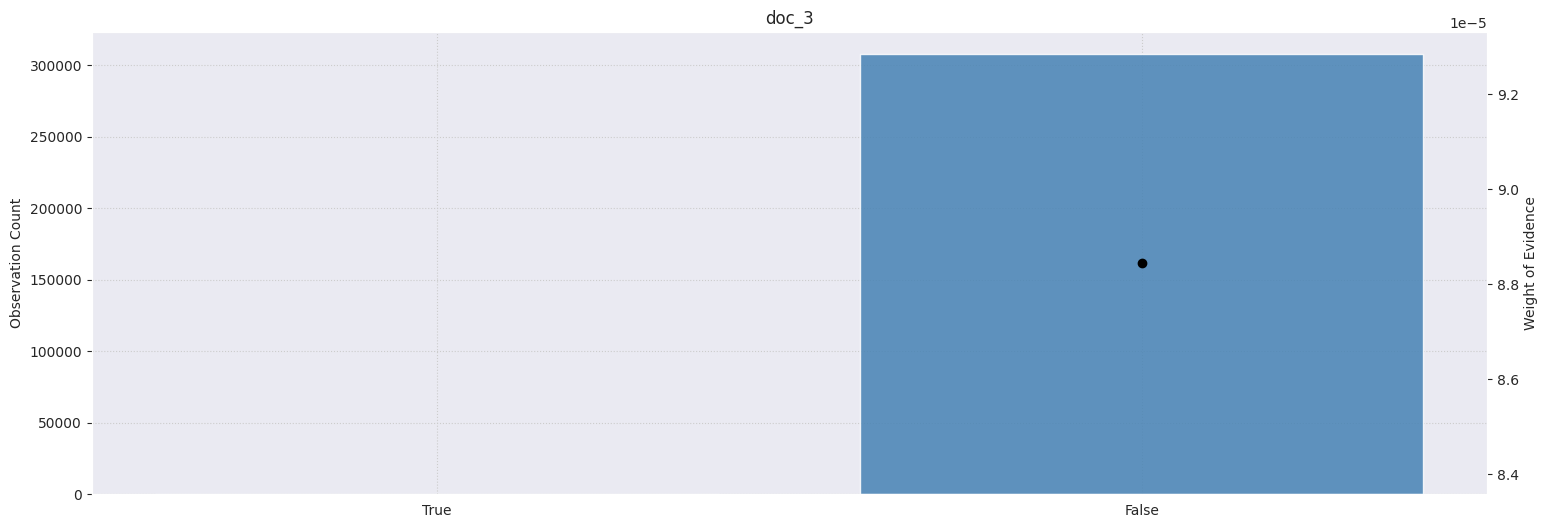

In [19]:
woe_analysis.discrete(column="doc_3", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,doc_4,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,True,4648,1.511491,372.0,8.003442,4276.0,91.996558,1.498489,1.512632,-0.009394,NaN,NaN,0.000001,1.328574e-06,True
1,False,302863,98.488509,24453.0,8.073948,278410.0,91.926052,98.501511,98.487368,0.000144,0.070505,0.009537,0.000001,2.030810e-08,True


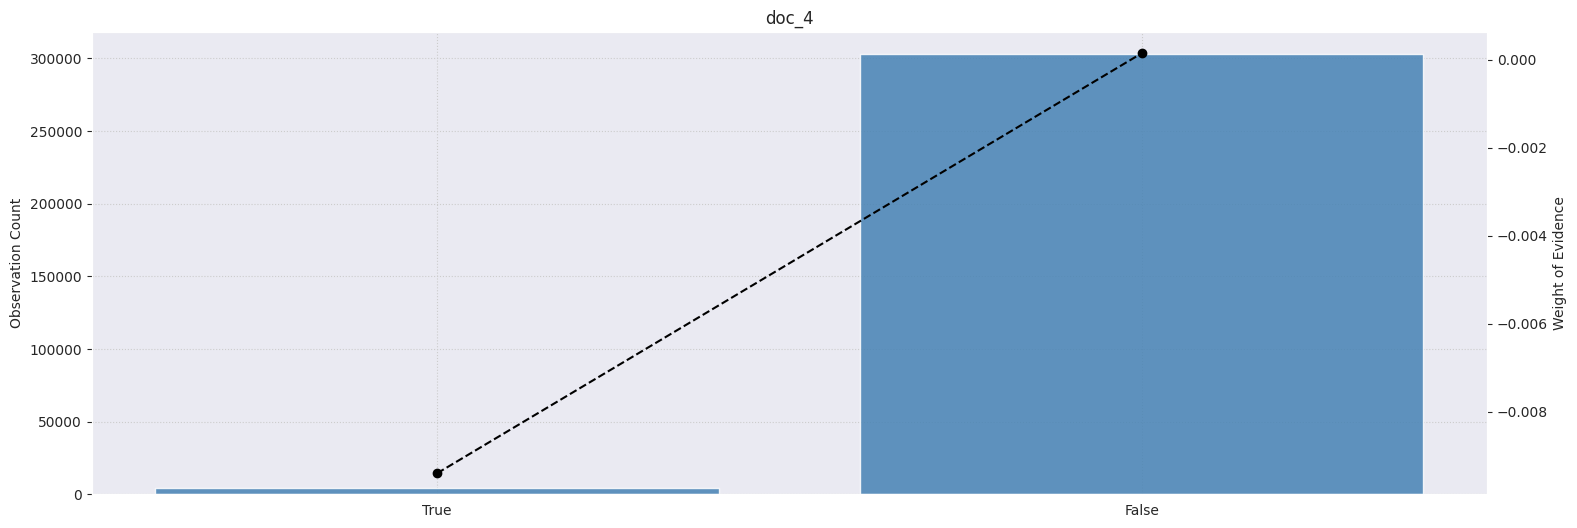

In [20]:
woe_analysis.discrete(column="doc_4", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,doc_5,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,True,27078,8.805539,1507.0,5.565404,25571.0,94.434596,6.070493,9.045726,-0.398852,NaN,NaN,0.012824,0.011867,True
1,False,280433,91.194461,23318.0,8.314999,257115.0,91.685001,93.929507,90.954274,0.032188,2.749595,0.43104,0.012824,0.000958,True


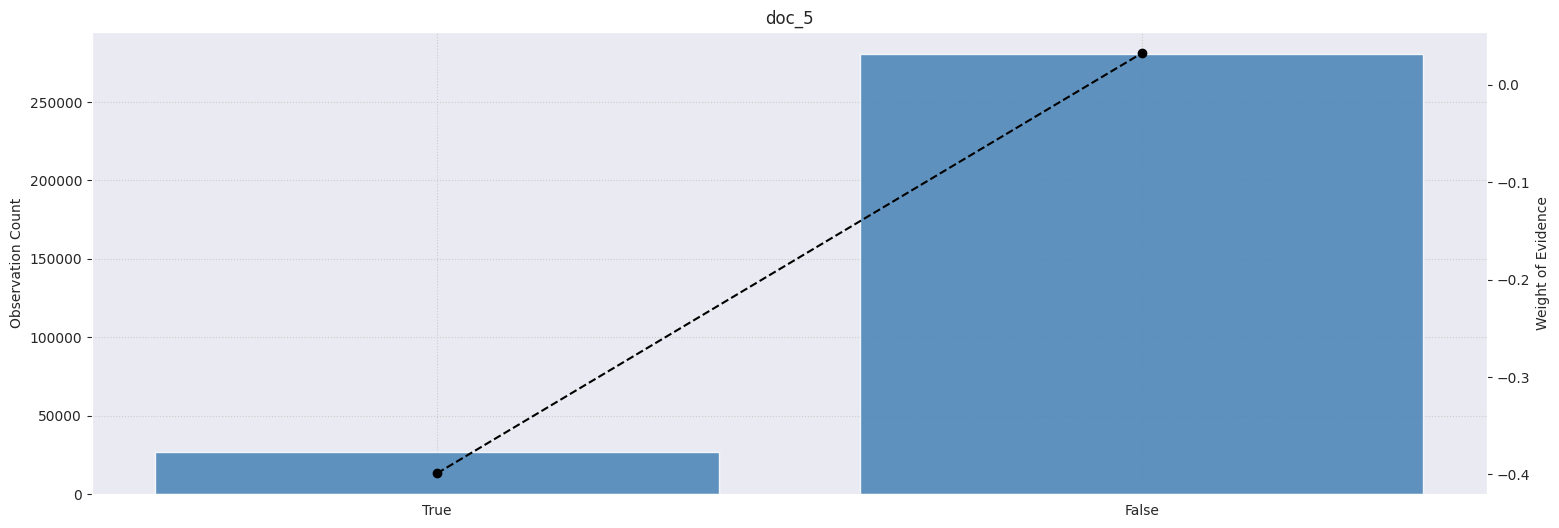

In [21]:
woe_analysis.discrete(column="doc_5", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,doc_6,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,True,59,0.019186,3.0,5.084746,56.0,94.915254,0.012085,0.01981,-0.494254,NaN,NaN,0.000038,3.818296e-05,True
1,False,307452,99.980814,24822.0,8.073455,282630.0,91.926545,99.987915,99.98019,0.000077,2.98871,0.494331,0.000038,5.969092e-09,True


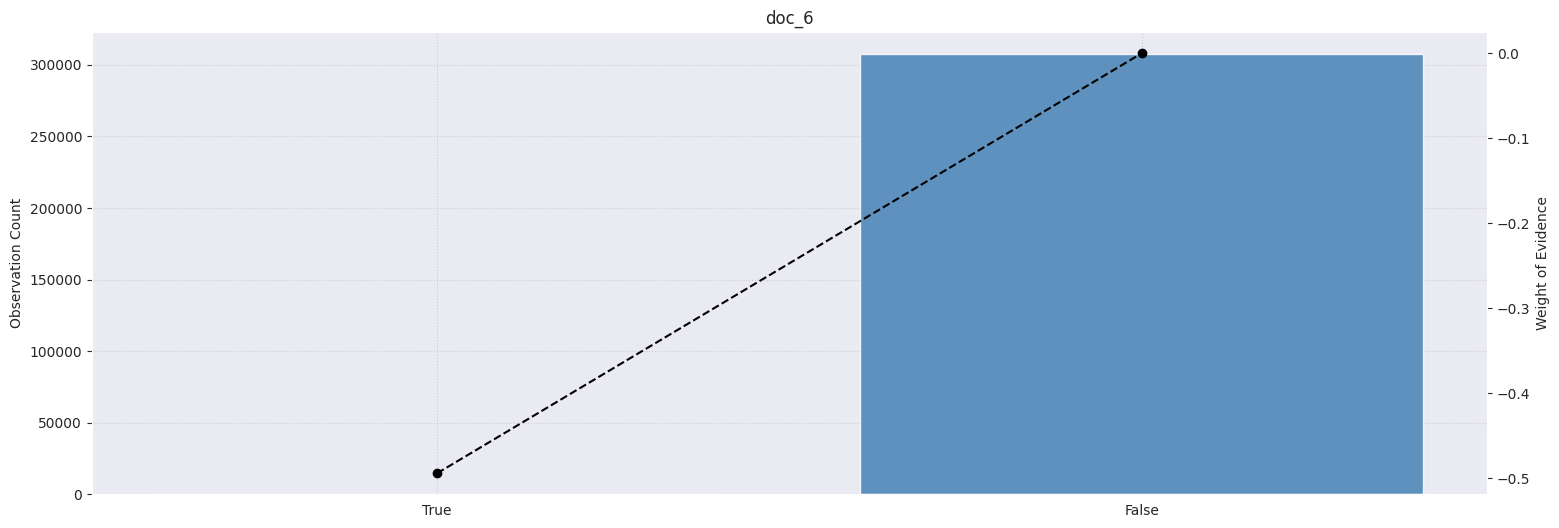

In [22]:
woe_analysis.discrete(column="doc_6", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,doc_7,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,True,25024,8.137595,1836.0,7.336957,23188.0,92.663043,7.39577,8.202741,-0.103560,NaN,NaN,0.000906,0.000836,True
1,False,282487,91.862405,22989.0,8.138074,259498.0,91.861926,92.60423,91.797259,0.008752,0.801117,0.112312,0.000906,0.000071,True


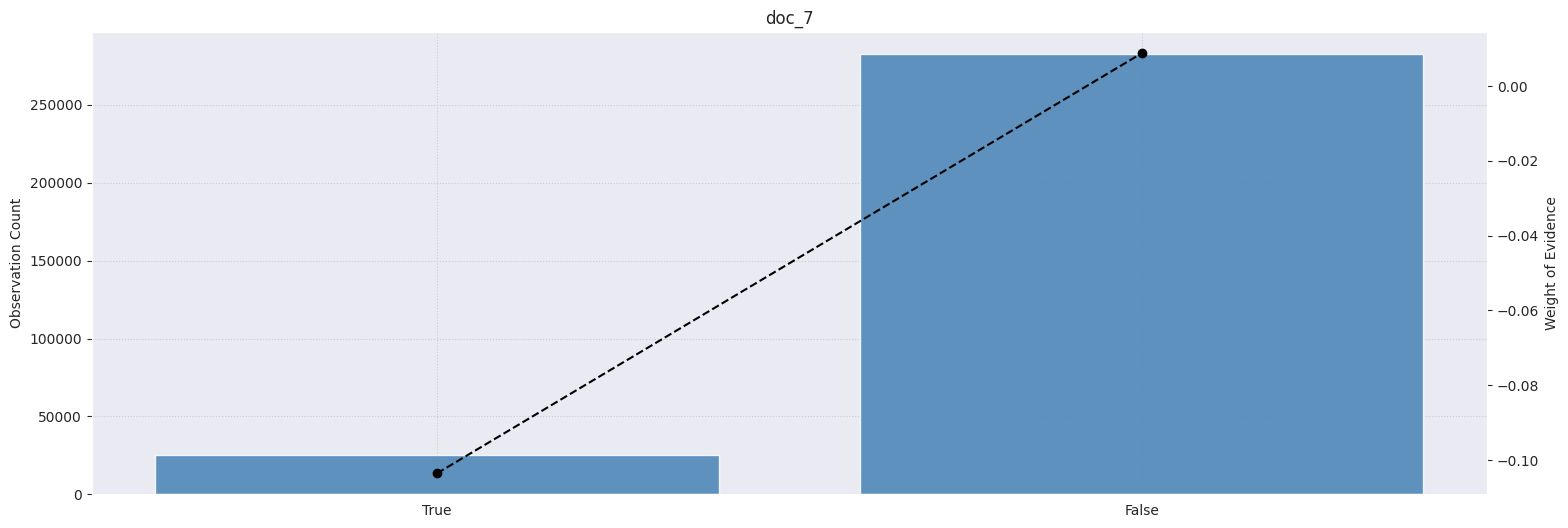

In [23]:
woe_analysis.discrete(column="doc_7", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,doc_8,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,True,1198,0.38958,74.0,6.176962,1124.0,93.823038,0.298087,0.397614,-0.288098,NaN,NaN,0.000288,2.867377e-04,True
1,False,306313,99.61042,24751.0,8.080297,281562.0,91.919703,99.701913,99.602386,0.000999,1.903335,0.289097,0.000288,9.940343e-07,True


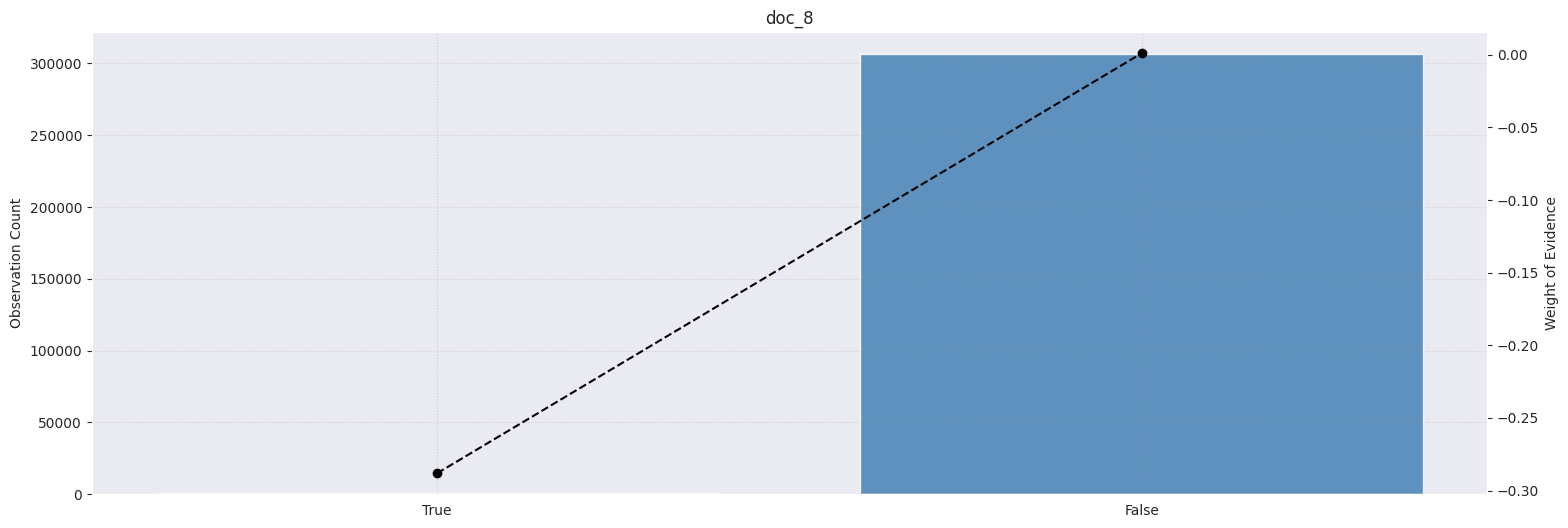

In [24]:
woe_analysis.discrete(column="doc_8", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,doc_9,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,True,7,0.002276,0.0,0.000000,7.0,100.000000,0.0,0.002476,-inf,NaN,NaN,inf,inf,True
1,False,307504,99.997724,24825.0,8.073066,282679.0,91.926934,100.0,99.997524,0.000025,8.073066,inf,inf,6.131869e-10,True


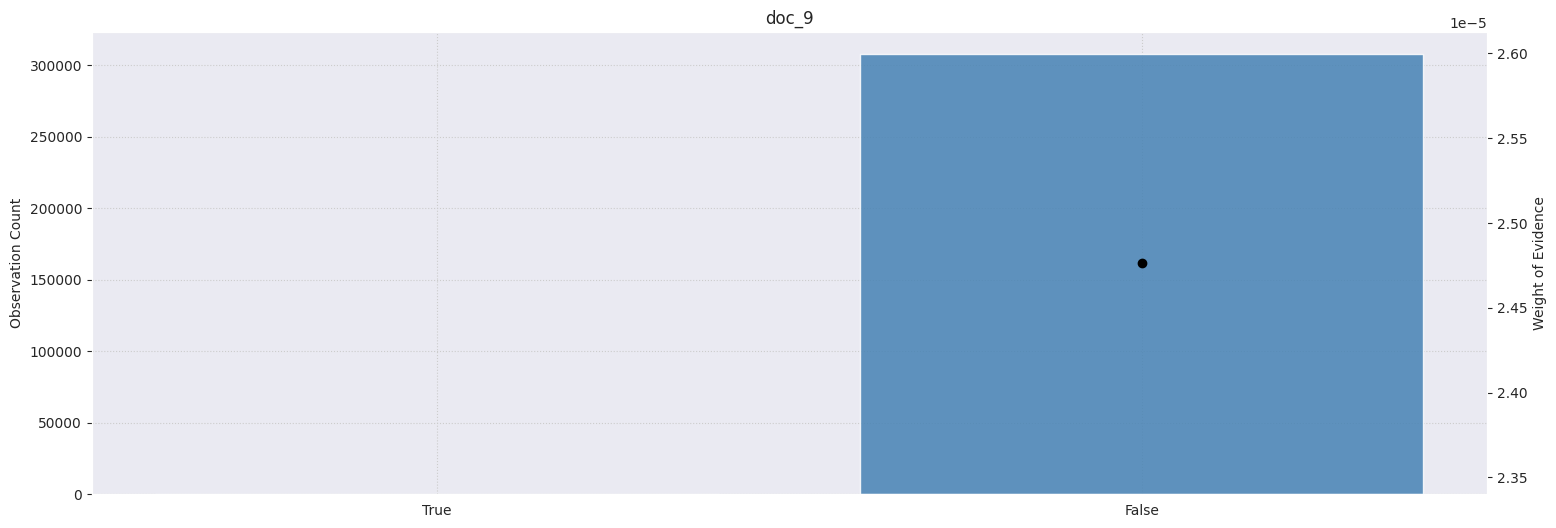

In [25]:
woe_analysis.discrete(column="doc_9", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,doc_10,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,True,1203,0.391206,75.0,6.234414,1128.0,93.765586,0.302115,0.399029,-0.278228,NaN,NaN,0.000271,2.696431e-04,True
1,False,306308,99.608794,24750.0,8.080102,281558.0,91.919898,99.697885,99.600971,0.000973,1.845688,0.2792,0.000271,9.425466e-07,True


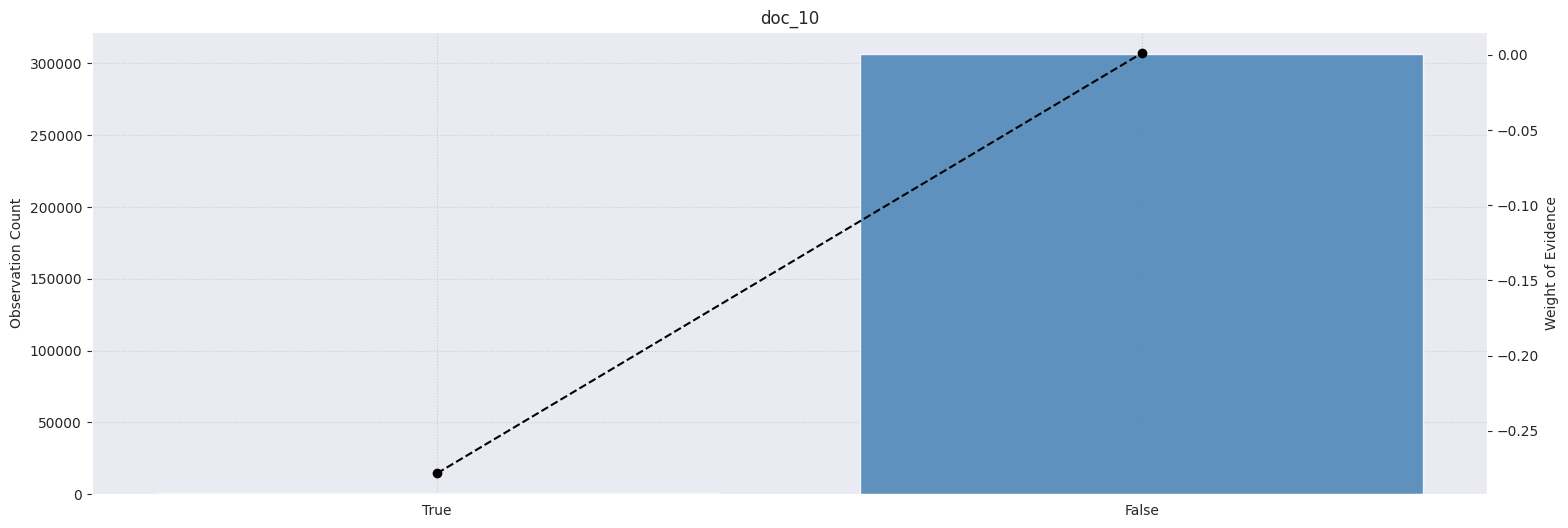

In [26]:
woe_analysis.discrete(column="doc_10", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,doc_11,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,True,2,0.00065,0.0,0.000000,2.0,100.000000,0.0,0.000707,-inf,NaN,NaN,inf,inf,True
1,False,307509,99.99935,24825.0,8.072934,282684.0,91.927066,100.0,99.999293,0.000007,8.072934,inf,inf,5.005563e-11,True


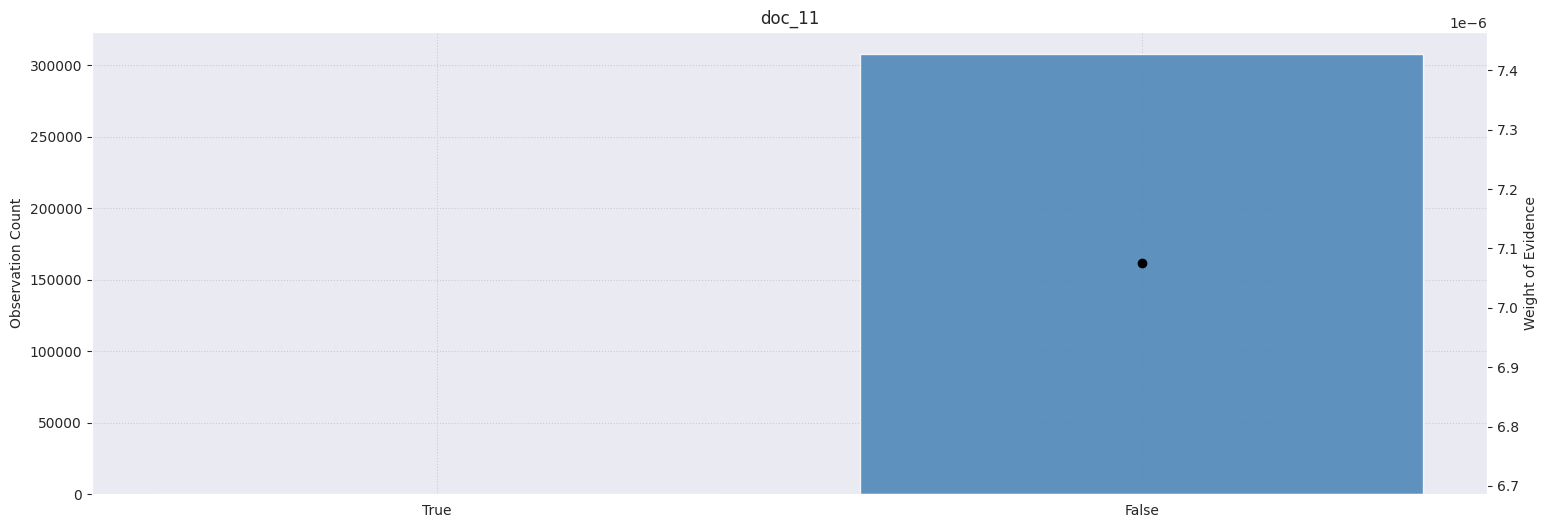

In [27]:
woe_analysis.discrete(column="doc_11", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,doc_12,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,True,1084,0.352508,30.0,2.767528,1054.0,97.232472,0.120846,0.372852,-1.126665,NaN,NaN,0.002846,0.002839,True
1,False,306427,99.647492,24795.0,8.091650,281632.0,91.908350,99.879154,99.627148,0.002526,5.324122,1.129191,0.002846,0.000006,True


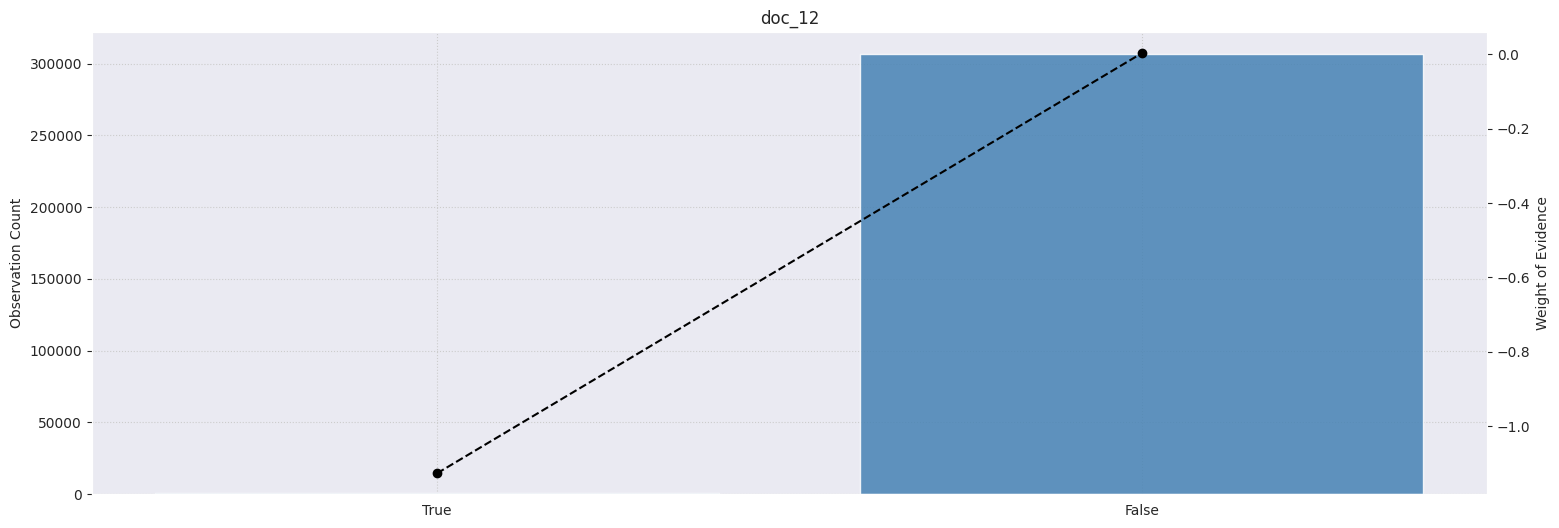

In [28]:
woe_analysis.discrete(column="doc_12", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,doc_13,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,True,903,0.293648,30.0,3.322259,873.0,96.677741,0.120846,0.308823,-0.938253,NaN,NaN,0.001767,0.001764,True
1,False,306608,99.706352,24795.0,8.086873,281813.0,91.913127,99.879154,99.691177,0.001884,4.764614,0.940136,0.001767,0.000004,True


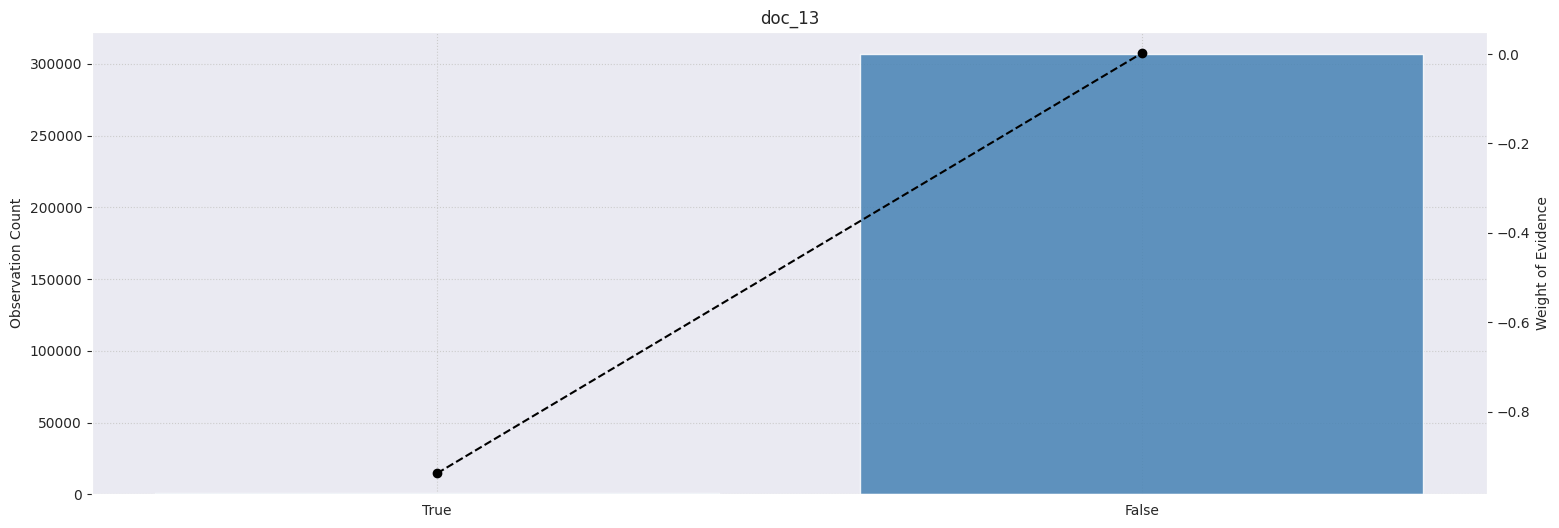

In [29]:
woe_analysis.discrete(column="doc_13", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,doc_14,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,True,372,0.120971,11.0,2.956989,361.0,97.043011,0.04431,0.127704,-1.058497,NaN,NaN,0.000883,8.827163e-04,True
1,False,307139,99.879029,24814.0,8.079078,282325.0,91.920922,99.95569,99.872296,0.000835,5.122089,1.059332,0.000883,6.960439e-07,True


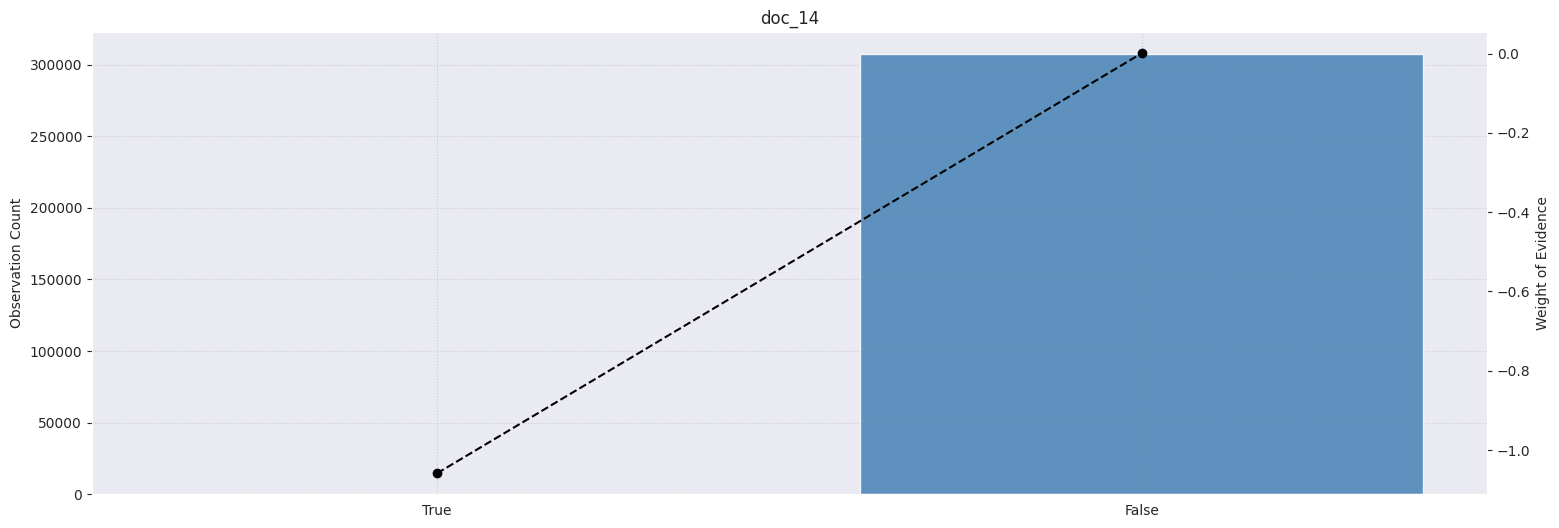

In [30]:
woe_analysis.discrete(column="doc_14", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,doc_15,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,True,3053,0.99281,150.0,4.913200,2903.0,95.086800,0.60423,1.026934,-0.530379,NaN,NaN,0.00226,0.002242,True
1,False,304458,99.00719,24675.0,8.104566,279783.0,91.895434,99.39577,98.973066,0.004262,3.191366,0.534641,0.00226,0.000018,True


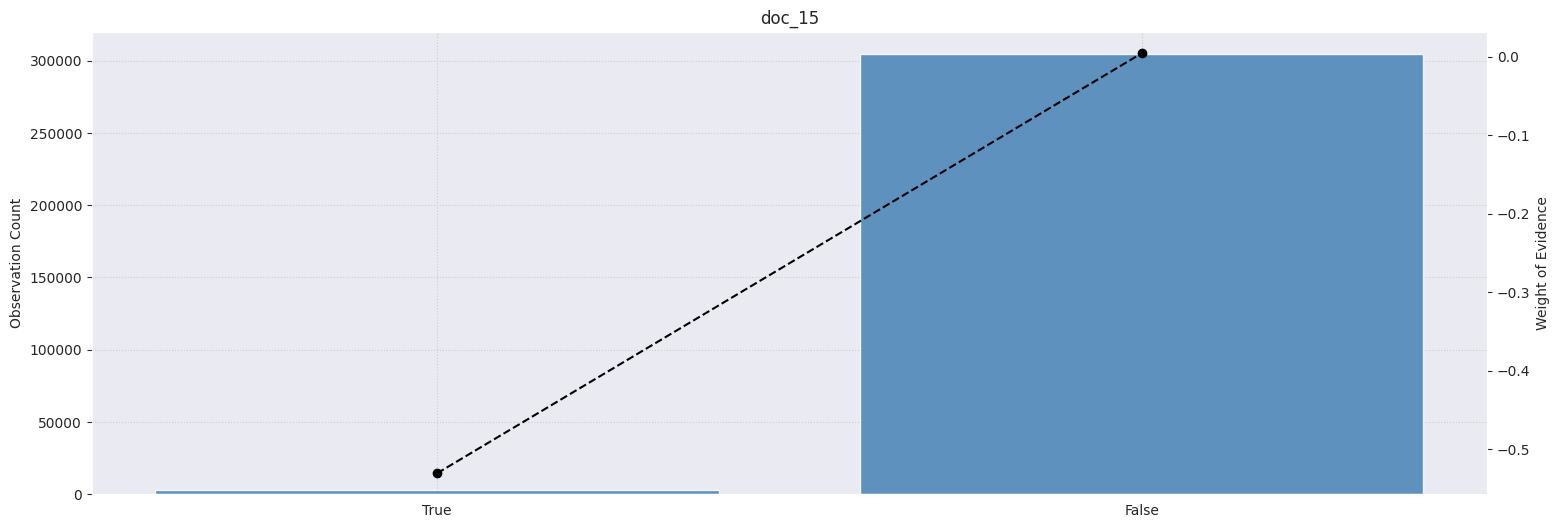

In [31]:
woe_analysis.discrete(column="doc_15", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,doc_16,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,True,82,0.026666,2.0,2.439024,80.0,97.560976,0.008056,0.0283,-1.256394,NaN,NaN,0.000254,2.543388e-04,True
1,False,307429,99.973334,24823.0,8.074385,282606.0,91.925615,99.991944,99.9717,0.000202,5.63536,1.256596,0.000254,4.098761e-08,True


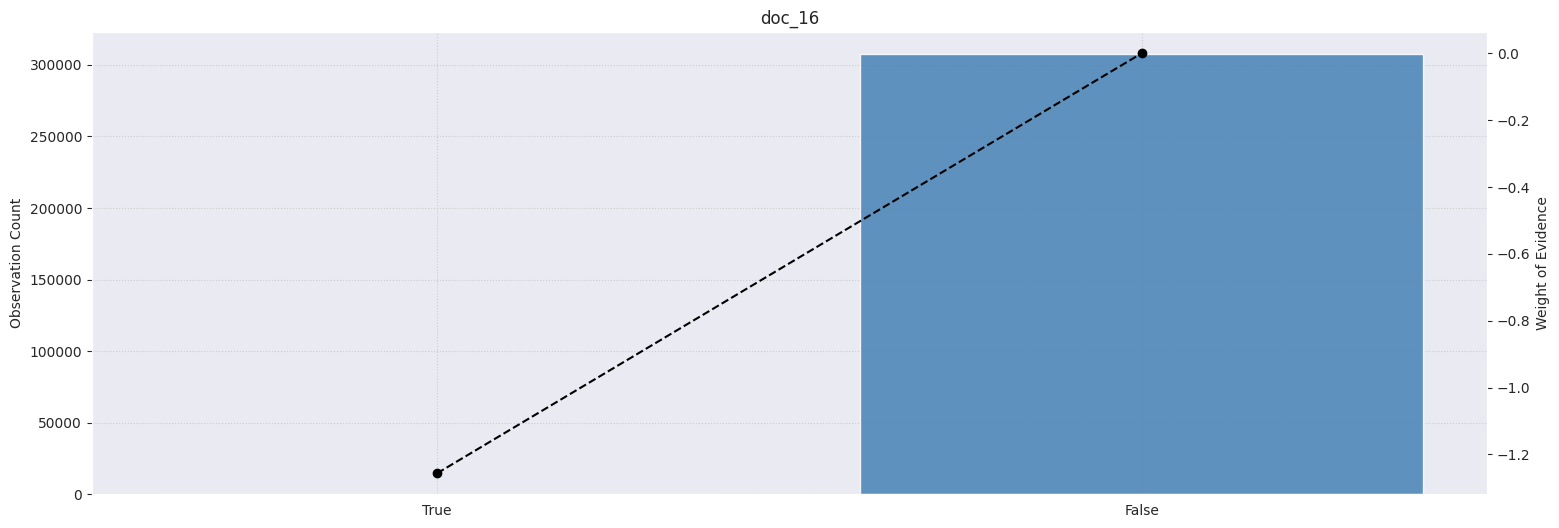

In [32]:
woe_analysis.discrete(column="doc_16", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,doc_17,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,True,2500,0.812979,142.0,5.680000,2358.0,94.320000,0.572004,0.834141,-0.377256,NaN,NaN,0.000996,0.000989,True
1,False,305011,99.187021,24683.0,8.092495,280328.0,91.907505,99.427996,99.165859,0.002640,2.412495,0.379896,0.000996,0.000007,True


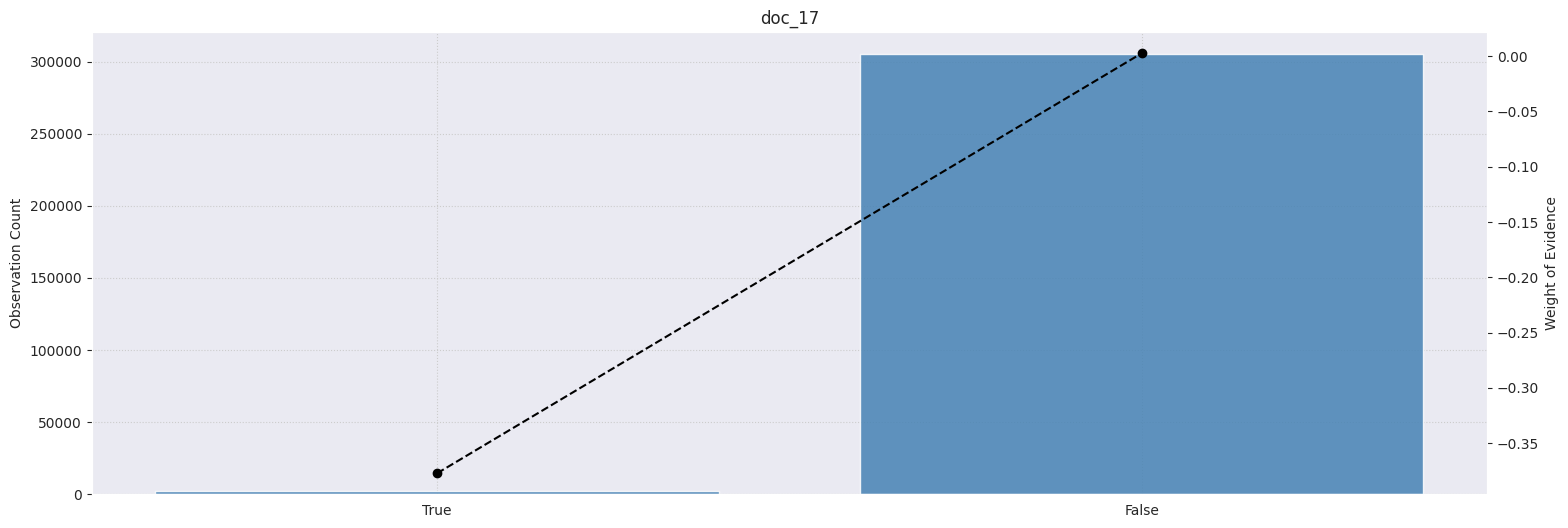

In [33]:
woe_analysis.discrete(column="doc_17", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,doc_18,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,True,183,0.05951,12.0,6.557377,171.0,93.442623,0.048338,0.060491,-0.224271,NaN,NaN,0.000027,2.725520e-05,True
1,False,307328,99.94049,24813.0,8.073784,282515.0,91.926216,99.951662,99.939509,0.000122,1.516407,0.224393,0.000027,1.477704e-08,True


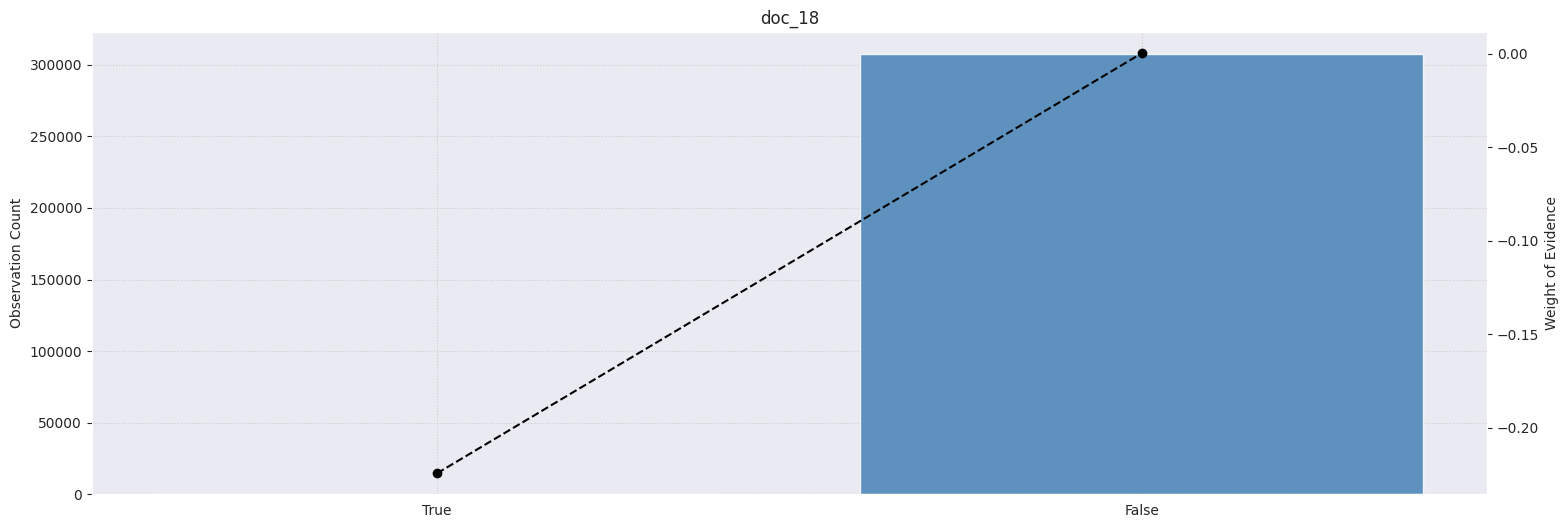

In [34]:
woe_analysis.discrete(column="doc_18", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,doc_19,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,False,307355,99.94927,24812.0,8.072750,282543.0,91.927250,99.947633,99.949414,-0.000018,NaN,NaN,6.161632e-07,3.171468e-10,True
1,True,156,0.05073,13.0,8.333333,143.0,91.666667,0.052367,0.050586,0.034590,0.260584,0.034608,6.161632e-07,6.158461e-07,True


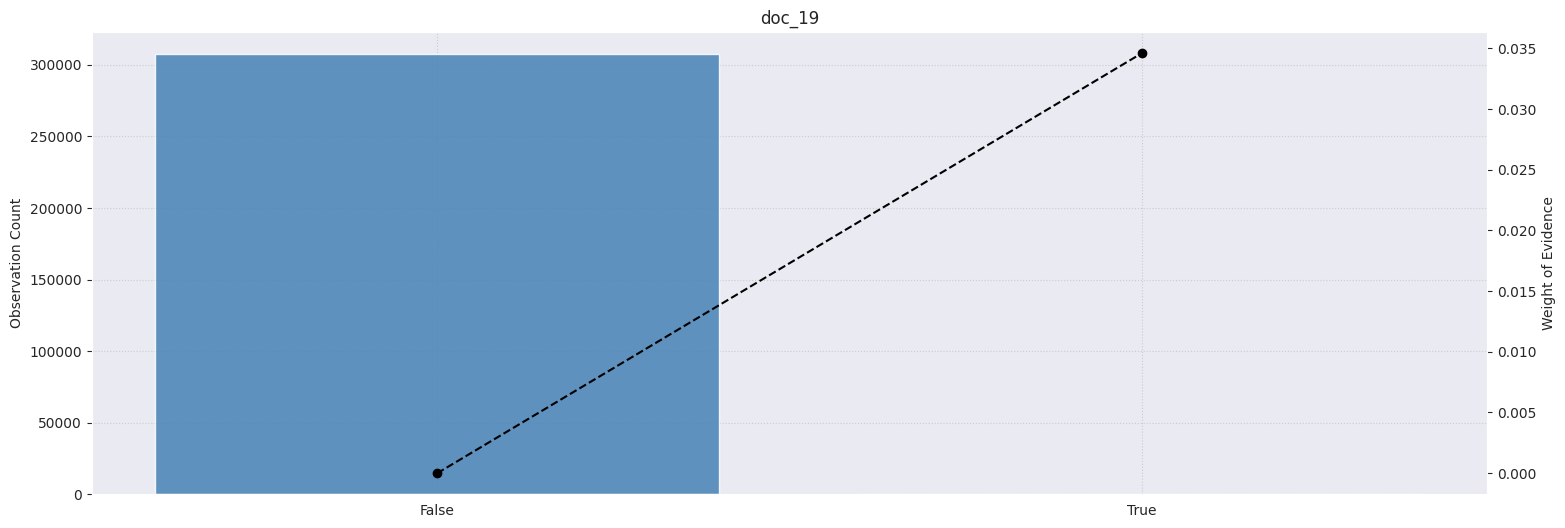

In [35]:
woe_analysis.discrete(column="doc_19", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,doc_20,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,False,307408,99.966505,24811.0,8.071033,282597.0,91.928967,99.943605,99.968516,-0.000249,NaN,NaN,0.000145,6.208341e-08,True
1,True,103,0.033495,14.0,13.592233,89.0,86.407767,0.056395,0.031484,0.582906,5.5212,0.583156,0.000145,1.452082e-04,True


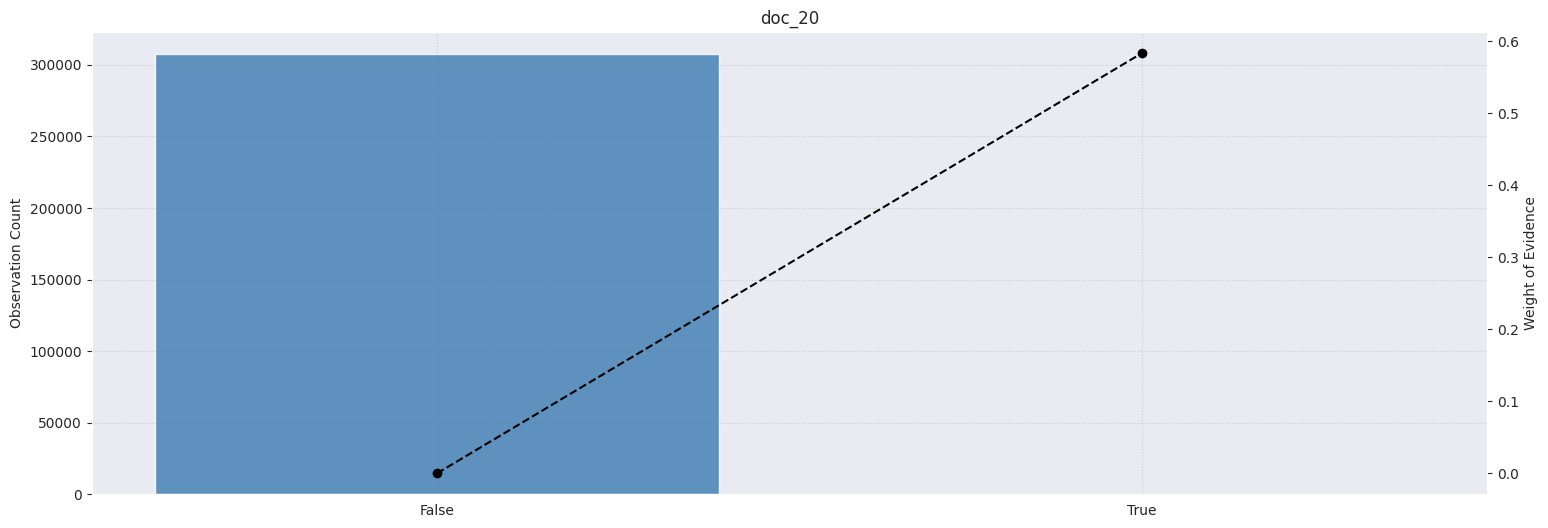

In [36]:
woe_analysis.discrete(column="doc_20", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,contact_mobile_count_x,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,1,38962,12.670116,2207.0,5.664494,36755.0,94.335506,8.890232,13.002059,-0.380155,NaN,NaN,0.017616,0.015631,True
1,2,170651,55.494275,14277.0,8.366198,156374.0,91.633802,57.510574,55.317207,0.038885,2.701704,0.419039,0.017616,0.000853,True
2,3,64482,20.969006,5481.0,8.500047,59001.0,91.499953,22.078550,20.871568,0.056219,0.133849,0.017334,0.017616,0.000679,True
3,4,33416,10.866603,2860.0,8.558774,30556.0,91.441226,11.520645,10.809166,0.063746,0.058728,0.007527,0.017616,0.000454,True


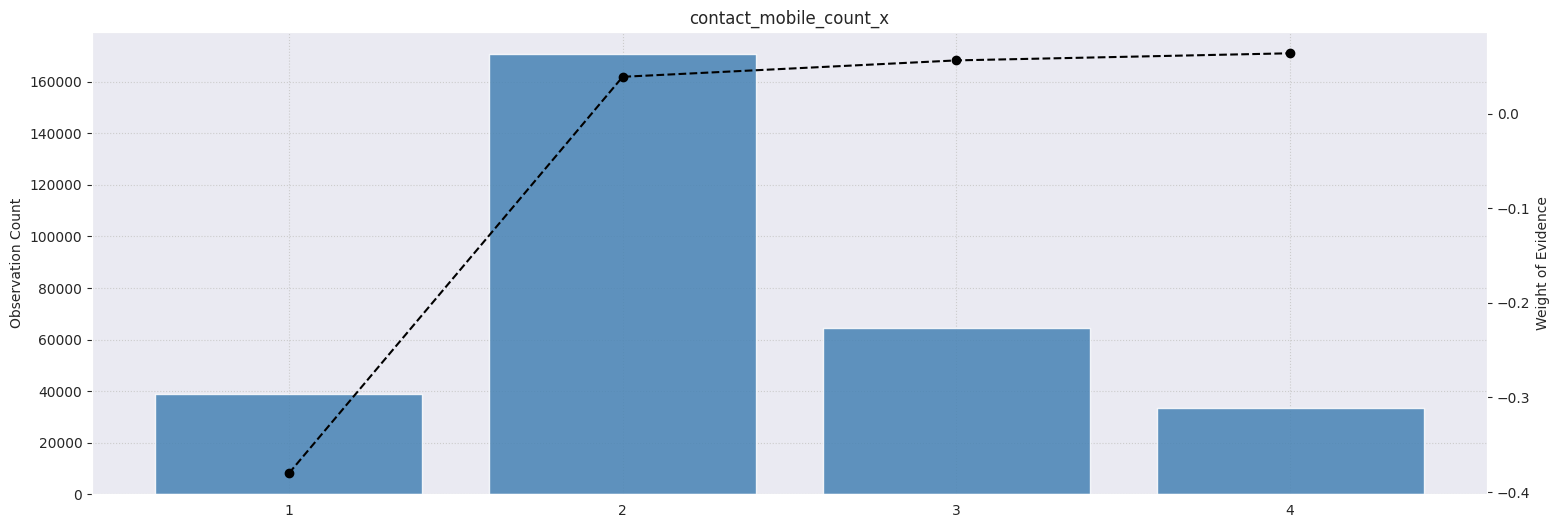

In [37]:
woe_analysis.discrete(column="contact_mobile_count_x", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,contact_mobile_count_y,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,2,7742,2.517634,359.0,4.637045,7383.0,95.362955,1.446123,2.611732,-0.591127,NaN,NaN,inf,0.006890,True
1,0,29549,9.609087,1632.0,5.523030,27917.0,94.476970,6.574018,9.875622,-0.406944,0.885985,0.184183,inf,0.013436,True
2,1,270056,87.819948,22817.0,8.448988,247239.0,91.551012,91.911380,87.460645,0.049636,2.925959,0.456580,inf,0.002209,True
3,3,163,0.053006,16.0,9.815951,147.0,90.184049,0.064451,0.052001,0.214642,1.366963,0.165006,inf,0.000027,True
4,4,1,0.000325,1.0,100.000000,0.0,0.000000,0.004028,0.000000,inf,90.184049,inf,inf,inf,True


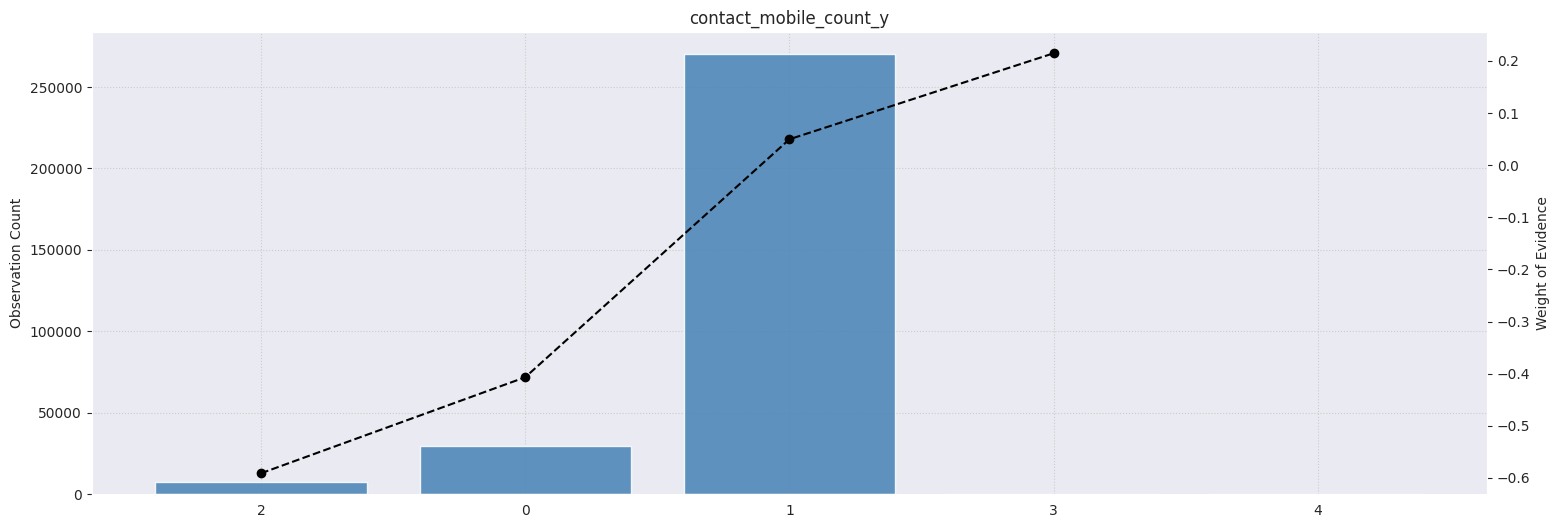

In [38]:
woe_analysis.discrete(column="contact_mobile_count_y", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,region_rating,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,1,32197,10.470195,1552.0,4.820325,30645.0,95.179675,6.251762,10.840650,-0.550440,NaN,NaN,0.048317,0.025259,True
1,2,226984,73.813294,17907.0,7.889102,209077.0,92.110898,72.132931,73.960861,-0.025025,3.068777,0.525414,0.048317,0.000457,True
2,3,48330,15.716511,5366.0,11.102835,42964.0,88.897165,21.615307,15.198489,0.352206,3.213732,0.377231,0.048317,0.022600,True


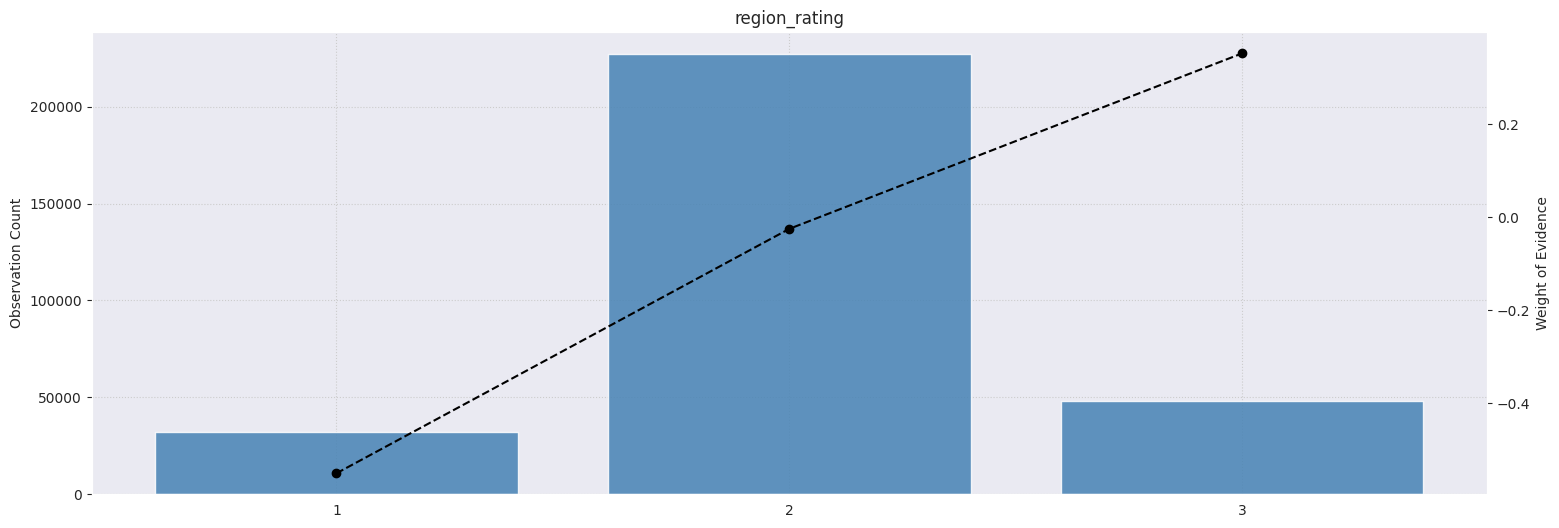

In [39]:
woe_analysis.discrete(column="region_rating", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,city_region_rating,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,1,34167,11.110822,1654.0,4.840928,32513.0,95.159072,6.662638,11.501454,-0.545958,NaN,NaN,0.051201,0.026418,True
1,2,229484,74.626274,18170.0,7.917763,211314.0,92.082237,73.192346,74.752199,-0.021088,3.076835,0.524870,0.051201,0.000329,True
2,3,43860,14.262904,5001.0,11.402189,38859.0,88.597811,20.145015,13.746348,0.382184,3.484425,0.403271,0.051201,0.024455,True


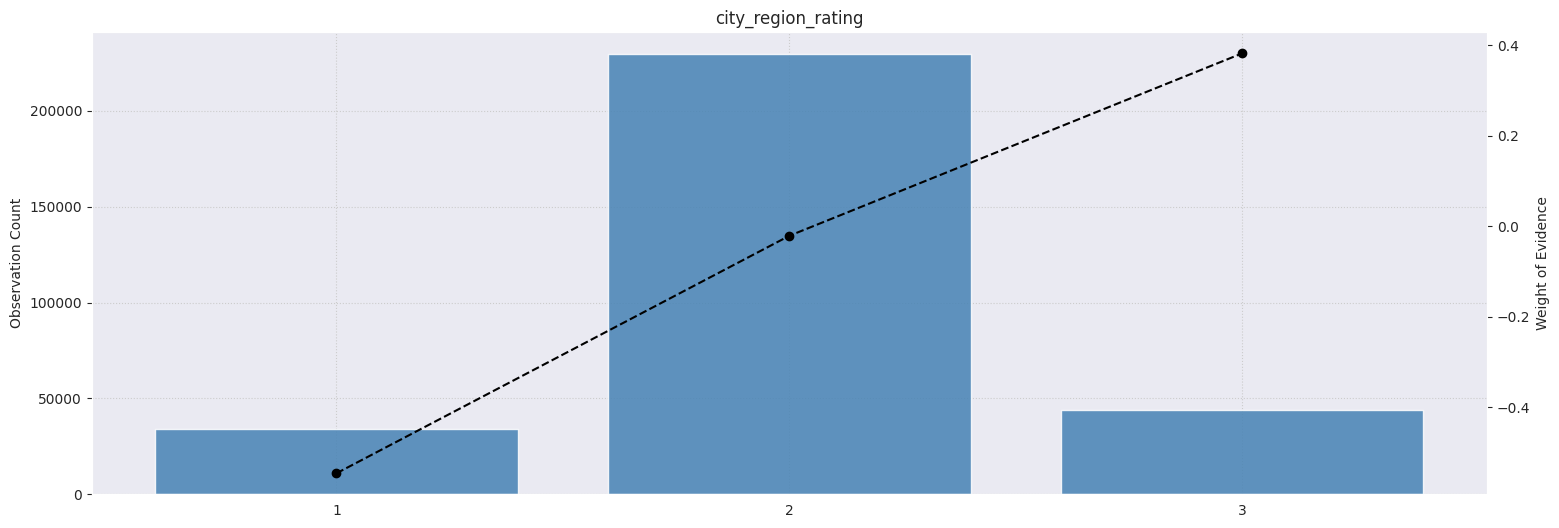

In [40]:
woe_analysis.discrete(column="city_region_rating", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,different_region_contact,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,False,302854,98.485583,24392.0,8.054046,278462.0,91.945954,98.255791,98.505763,-0.002541,NaN,NaN,0.000393,0.000006,True
1,True,4657,1.514417,433.0,9.297831,4224.0,90.702169,1.744209,1.494237,0.154685,1.243785,0.157226,0.000393,0.000387,True


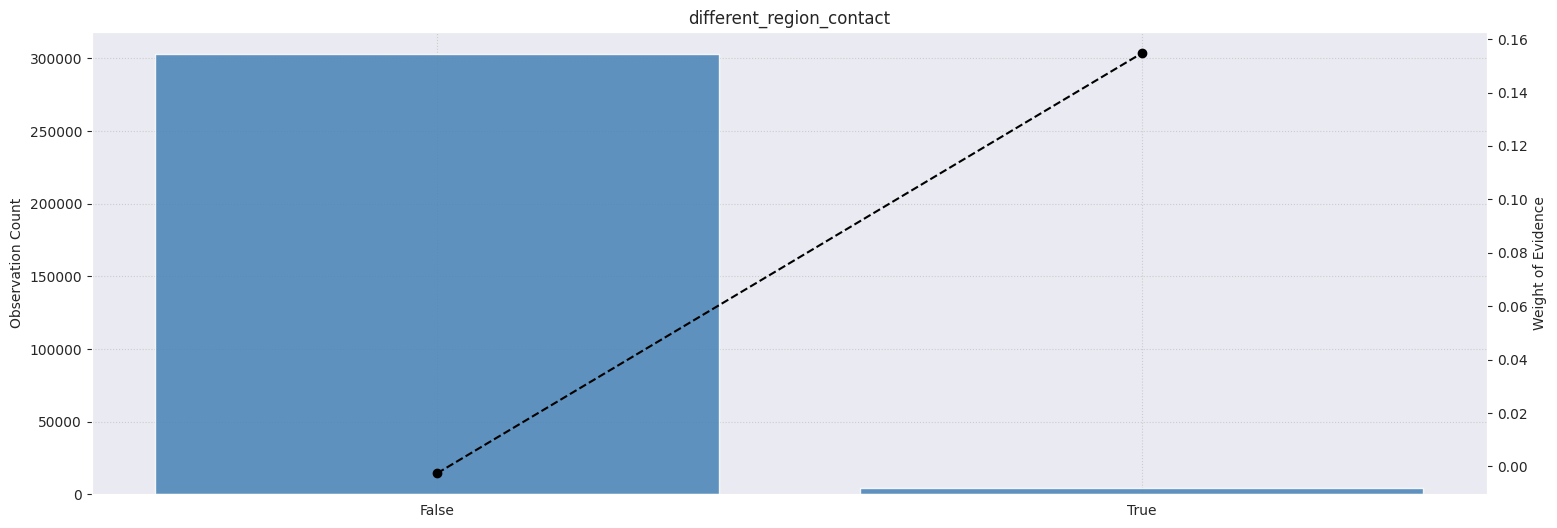

In [41]:
woe_analysis.discrete(column="different_region_contact", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,different_region_work,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,False,291899,94.923108,23437.0,8.029147,268462.0,91.970853,94.408862,94.968269,-0.005908,NaN,NaN,0.000623,0.000033,True
1,True,15612,5.076892,1388.0,8.890597,14224.0,91.109403,5.591138,5.031731,0.105419,0.86145,0.111327,0.000623,0.000590,True


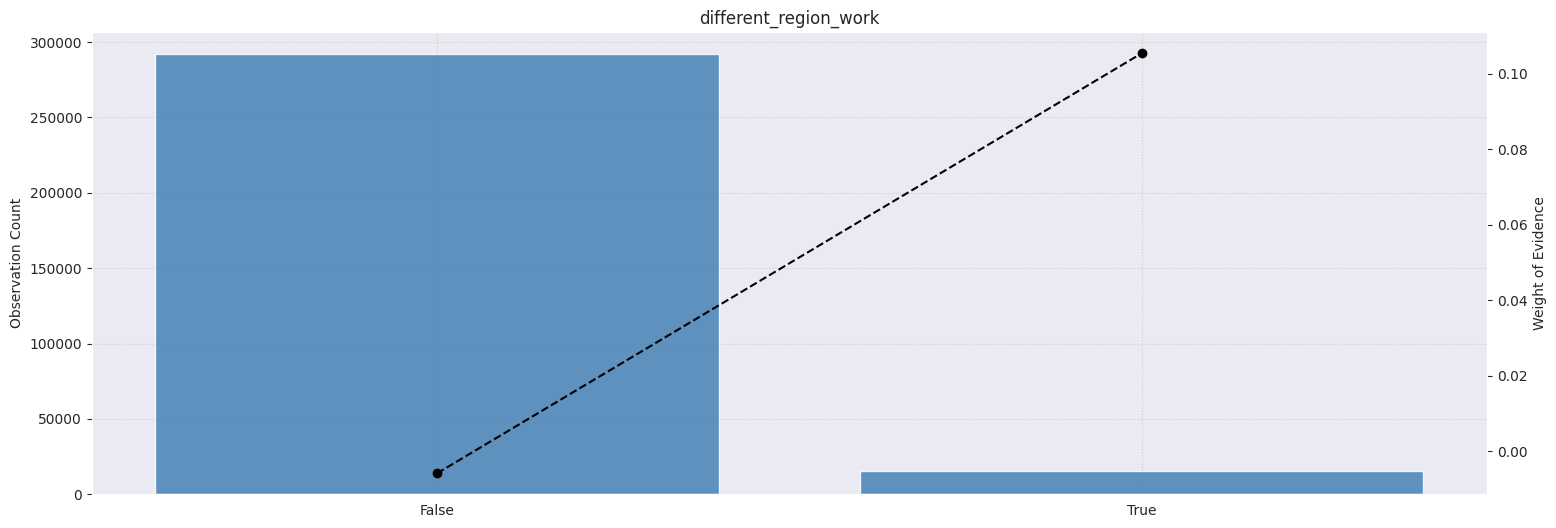

In [42]:
woe_analysis.discrete(column="different_region_work", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,different_region_live_work,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,False,295008,95.934129,23769.0,8.057070,271239.0,91.942930,95.746224,95.950631,-0.002133,NaN,NaN,0.000105,0.000004,True
1,True,12503,4.065871,1056.0,8.445973,11447.0,91.554027,4.253776,4.049369,0.049246,0.388903,0.051379,0.000105,0.000101,True


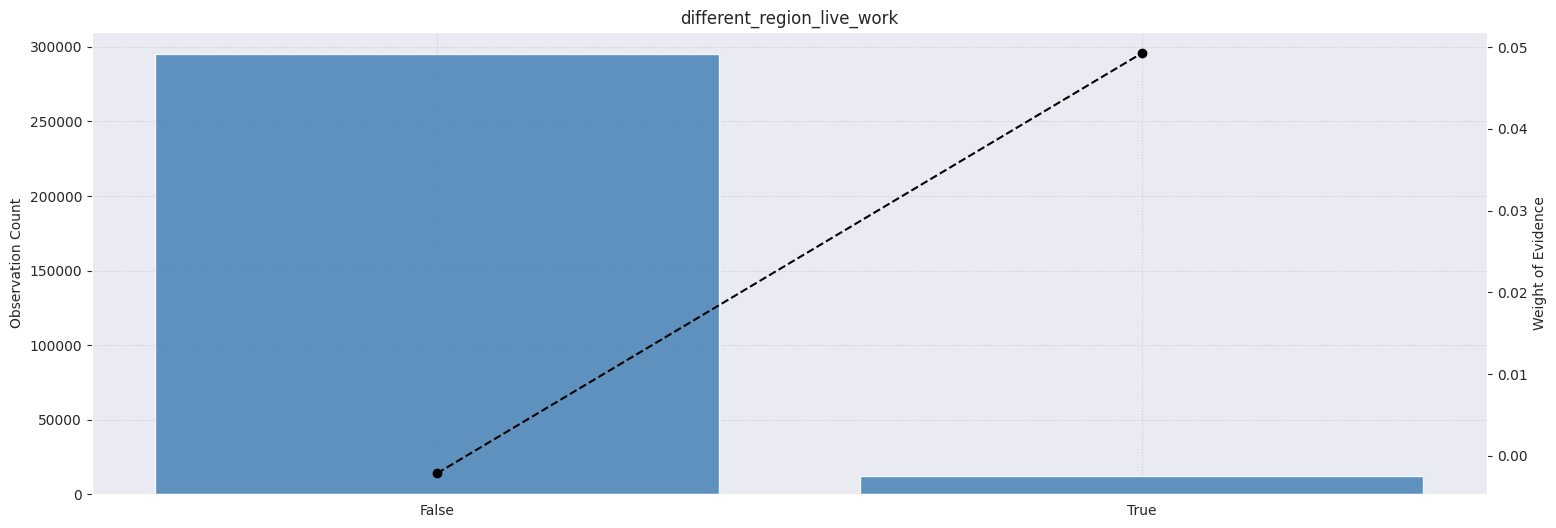

In [43]:
woe_analysis.discrete(column="different_region_live_work", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,different_city_contact,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,False,283472,92.182719,21886.0,7.720692,261586.0,92.279308,88.161128,92.535888,-0.048430,NaN,NaN,0.022299,0.002119,True
1,True,24039,7.817281,2939.0,12.225966,21100.0,87.774034,11.838872,7.464112,0.461282,4.505274,0.509712,0.022299,0.020180,True


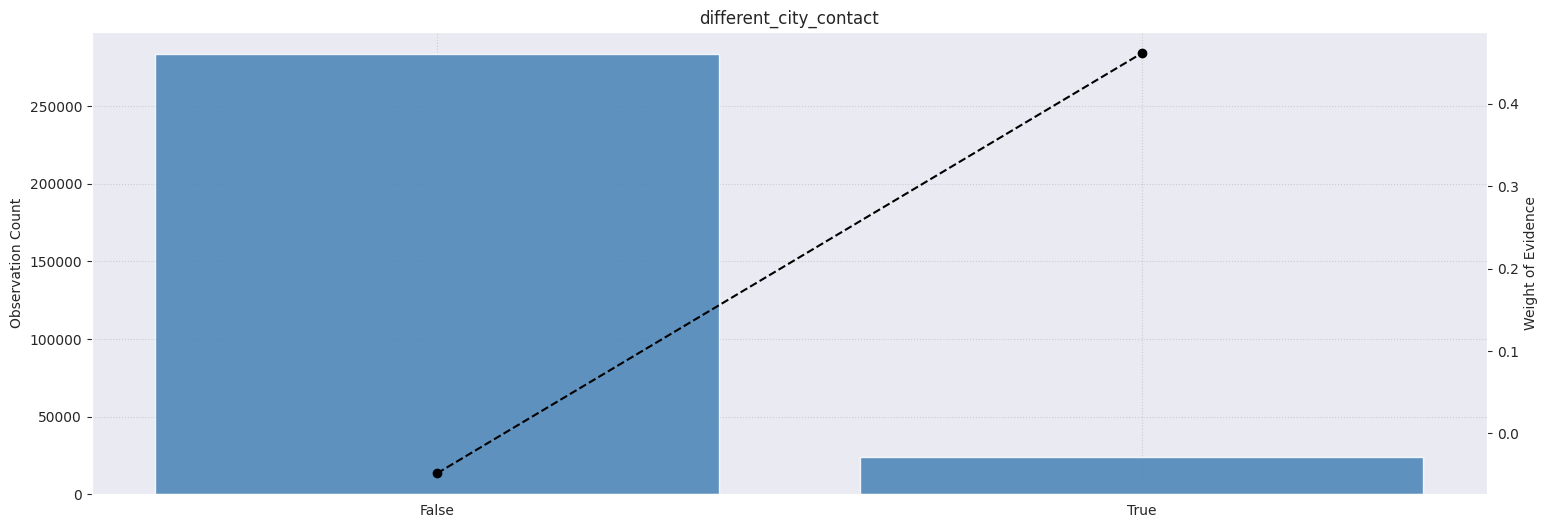

In [44]:
woe_analysis.discrete(column="different_city_contact", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,different_city_work,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,False,236644,76.954646,17305.0,7.312672,219339.0,92.687328,69.707956,77.591037,-0.107137,NaN,NaN,0.032207,0.008446,True
1,True,70867,23.045354,7520.0,10.611427,63347.0,89.388573,30.292044,22.408963,0.301424,3.298755,0.408562,0.032207,0.023762,True


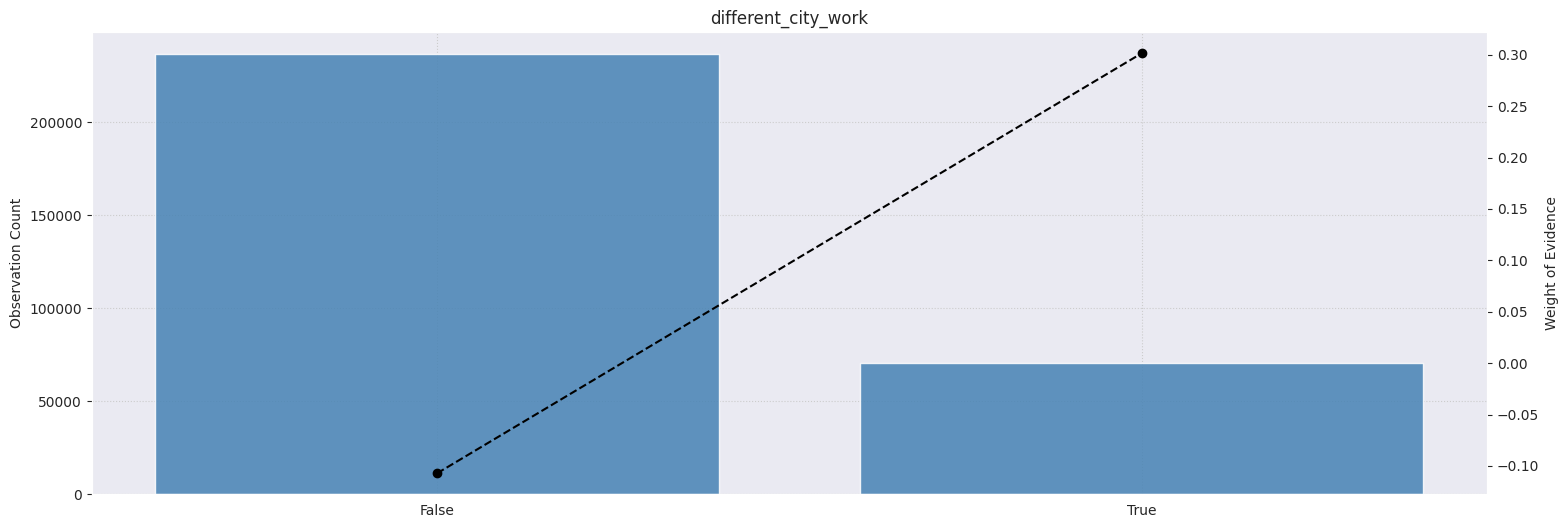

In [45]:
woe_analysis.discrete(column="different_city_work", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,different_city_live_work,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,False,252296,82.044545,19322.0,7.658465,232974.0,92.341535,77.83283,82.41441,-0.057197,NaN,NaN,0.013228,0.002621,True
1,True,55215,17.955455,5503.0,9.966495,49712.0,90.033505,22.16717,17.58559,0.231533,2.30803,0.28873,0.013228,0.010608,True


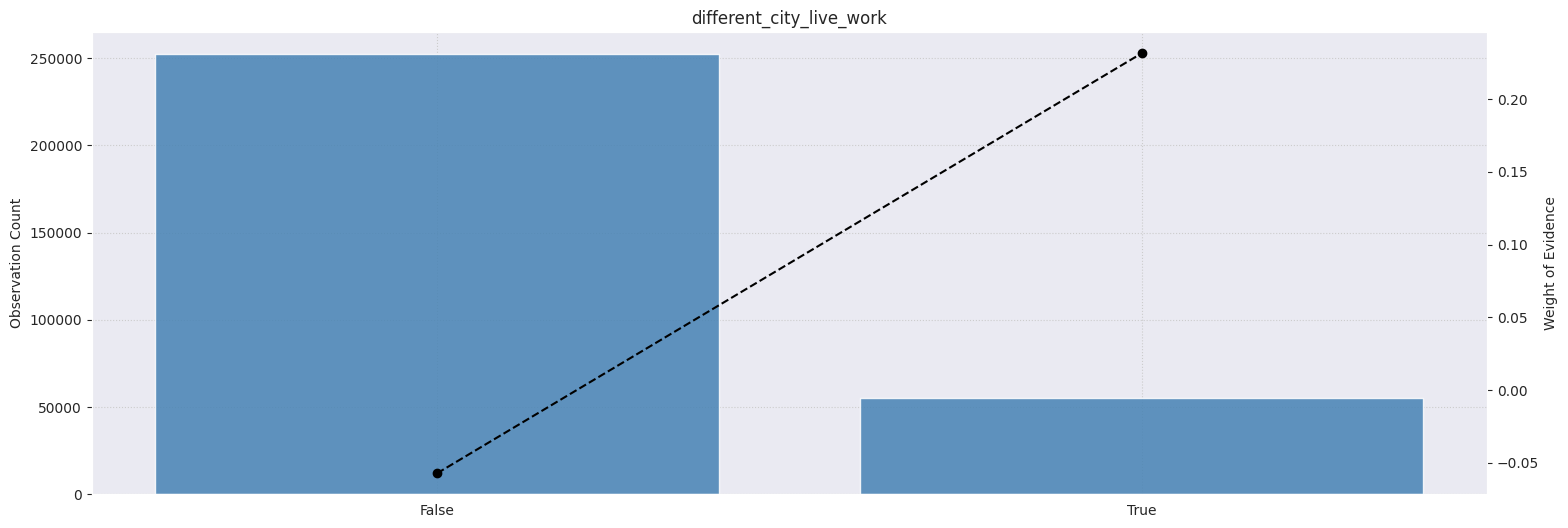

In [46]:
woe_analysis.discrete(column="different_city_live_work", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,avg_geographical_rating,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,1.5,1248,0.405839,59.0,4.727564,1189.0,95.272436,0.237664,0.420608,-0.570845,NaN,NaN,0.051218,0.001044,True
1,1.0,32197,10.470195,1552.0,4.820325,30645.0,95.179675,6.251762,10.840650,-0.550440,0.092761,0.020405,0.051218,0.025259,True
2,2.0,226458,73.642244,17891.0,7.900361,208567.0,92.099639,72.068479,73.780449,-0.023477,3.080036,0.526963,0.051218,0.000402,True
3,2.5,3748,1.218818,322.0,8.591249,3426.0,91.408751,1.297080,1.211945,0.067888,0.690887,0.091365,0.051218,0.000058,True
4,3.0,43860,14.262904,5001.0,11.402189,38859.0,88.597811,20.145015,13.746348,0.382184,2.810940,0.314295,0.051218,0.024455,True


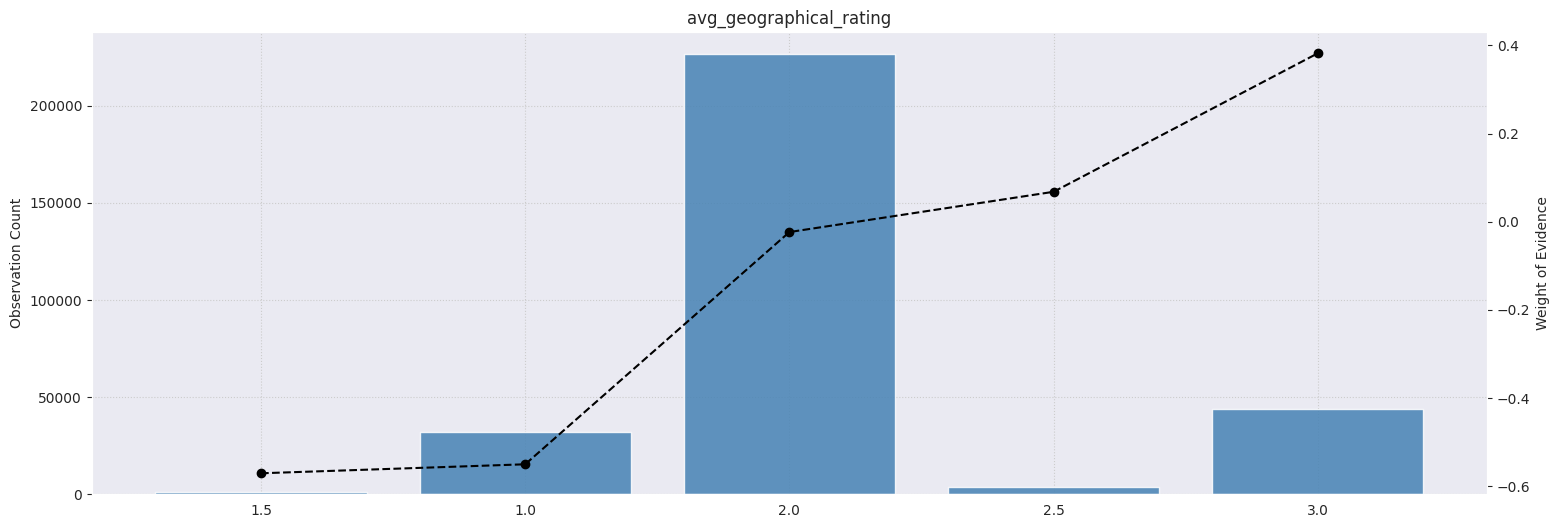

In [47]:
woe_analysis.discrete(column="avg_geographical_rating", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,gender,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,XNA,4,0.001301,0.0,0.000000,4.0,100.000000,0.000000,0.001415,-inf,NaN,NaN,inf,inf,True
1,F,202448,65.834393,14170.0,6.999328,188278.0,93.000672,57.079557,66.603228,-0.154307,6.999328,inf,inf,0.014696,True
2,M,105059,34.164306,10655.0,10.141920,94404.0,89.858080,42.920443,33.395357,0.250931,3.142592,0.405238,inf,0.023901,True


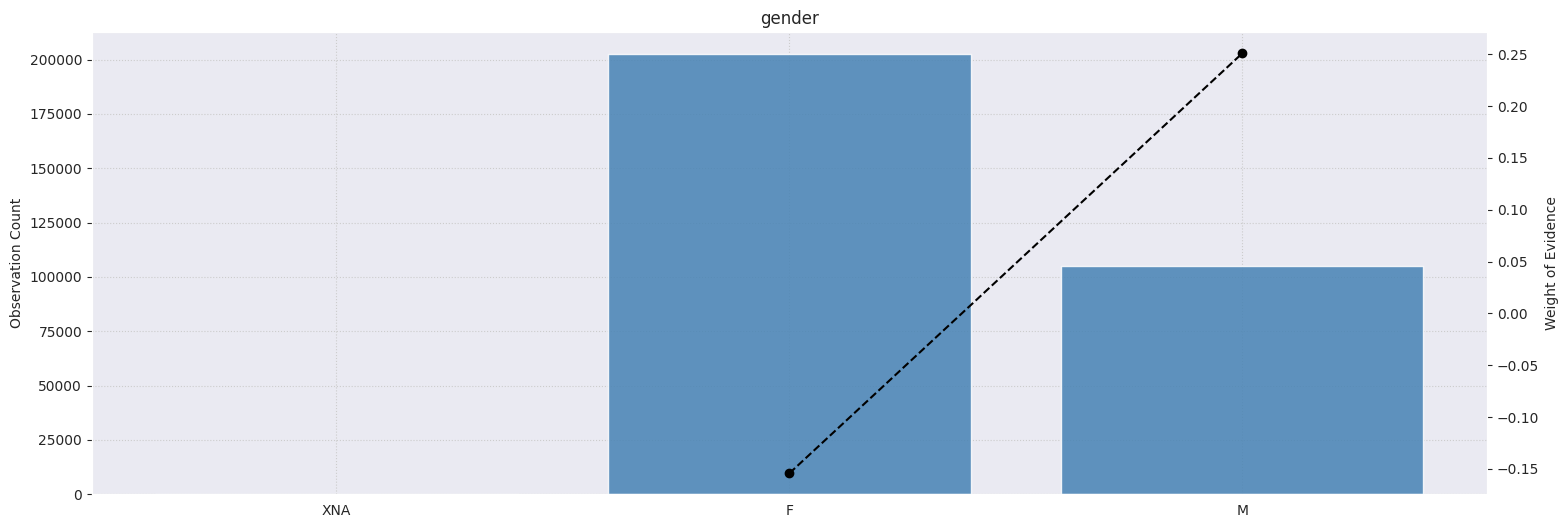

In [48]:
woe_analysis.discrete(column="gender", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,family_status,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,Unknown,2,0.000650,0.0,0.000000,2.0,100.000000,0.000000,0.000707,-inf,NaN,NaN,inf,inf,True
1,Widow,16088,5.231683,937.0,5.824217,15151.0,94.175783,3.774421,5.359657,-0.350653,5.824217,inf,inf,0.005559,True
2,Married,196432,63.878040,14850.0,7.559868,181582.0,92.440132,59.818731,64.234522,-0.071222,1.735651,0.279431,inf,0.003145,True
3,Separated,19770,6.429038,1620.0,8.194234,18150.0,91.805766,6.525680,6.420551,0.016241,0.634366,0.087463,inf,0.000017,True
4,Single / not married,45444,14.778008,4457.0,9.807675,40987.0,90.192325,17.953676,14.499126,0.213706,1.613442,0.197465,inf,0.007383,True
5,Civil marriage,29775,9.682580,2961.0,9.944584,26814.0,90.055416,11.927492,9.485436,0.229088,0.136909,0.015382,inf,0.005594,True


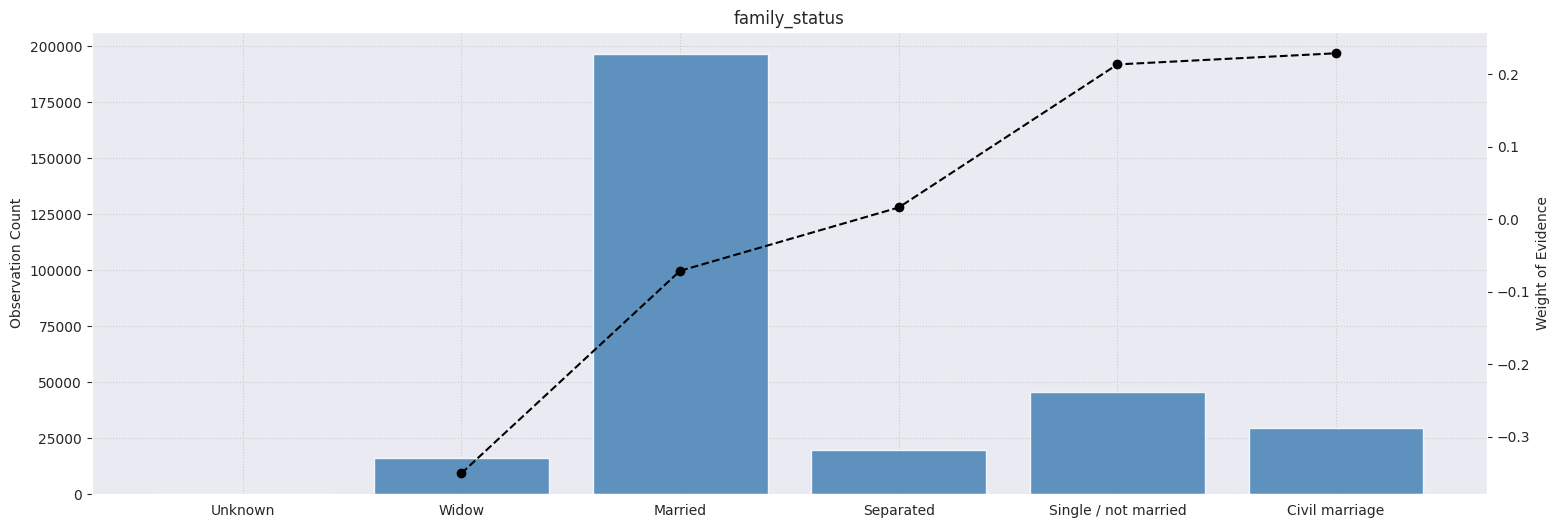

In [49]:
woe_analysis.discrete(column="family_status", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,housing_status,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,Office apartment,2617,0.851026,172.0,6.572411,2445.0,93.427589,0.692850,0.864917,-0.221820,NaN,NaN,0.01573,0.000382,True
1,House / apartment,272868,88.734387,21272.0,7.795711,251596.0,92.204289,85.687815,89.001931,-0.037947,1.223300,0.183873,0.01573,0.001258,True
2,Co-op apartment,1122,0.364865,89.0,7.932264,1033.0,92.067736,0.358510,0.365423,-0.019101,0.136553,0.018847,0.01573,0.000001,True
3,Municipal apartment,11183,3.636618,955.0,8.539748,10228.0,91.460252,3.846928,3.618149,0.061313,0.607484,0.080413,0.01573,0.000140,True
4,With parents,14840,4.825844,1736.0,11.698113,13104.0,88.301887,6.992951,4.635532,0.411152,3.158365,0.349839,0.01573,0.009693,True
5,Rented apartment,4881,1.587260,601.0,12.313051,4280.0,87.686949,2.420947,1.514047,0.469372,0.614937,0.058221,0.01573,0.004257,True


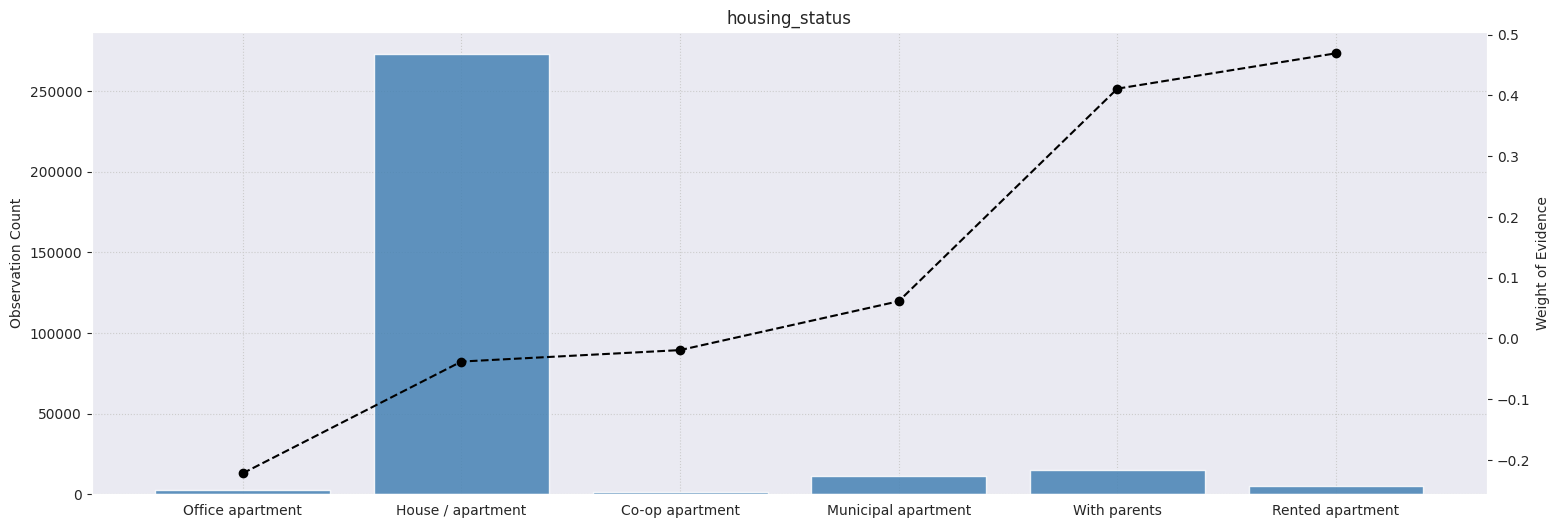

In [50]:
woe_analysis.discrete(column="housing_status", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,education_level,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,Academic degree,164,0.053331,3.0,1.829268,161.0,98.170732,0.012085,0.056954,-1.550307,NaN,NaN,0.050836,0.000696,True
1,Higher education,74863,24.344820,4009.0,5.355115,70854.0,94.644885,16.149043,25.064559,-0.439594,3.525847,1.110712,0.050836,0.039192,True
2,Incomplete higher,10277,3.341994,872.0,8.484966,9405.0,91.515034,3.512588,3.327013,0.054278,3.129851,0.493872,0.050836,0.000101,True
3,Secondary / secondary special,218391,71.018923,19524.0,8.939929,198867.0,91.060071,78.646526,70.349080,0.111494,0.454962,0.057216,0.050836,0.009251,True
4,Lower secondary,3816,1.240931,417.0,10.927673,3399.0,89.072327,1.679758,1.202394,0.334335,1.987744,0.222841,0.050836,0.001596,True


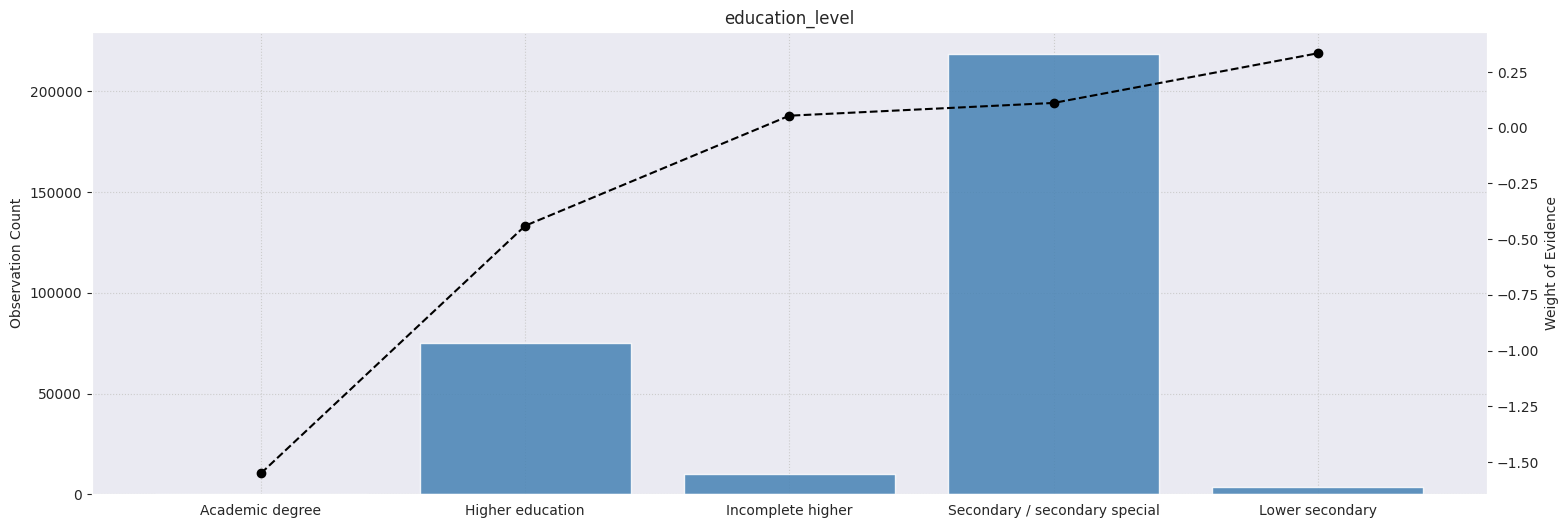

In [51]:
woe_analysis.discrete(column="education_level", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,occupation,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,Accountants,9813,4.648067,474.0,4.830327,9339.0,95.169673,2.555669,4.849590,-0.640580,NaN,NaN,0.086243,0.014694,False
1,High skill tech staff,11380,5.390299,701.0,6.159930,10679.0,93.840070,3.779587,5.545430,-0.383359,1.329603,0.257221,0.086243,0.006770,False
2,Managers,21371,10.122679,1328.0,6.214028,20043.0,93.785972,7.160188,10.408001,-0.374039,0.054099,0.009321,0.086243,0.012148,False
3,Core staff,27570,13.058924,1738.0,6.303954,25832.0,93.696046,9.370788,13.414134,-0.358712,0.089925,0.015327,0.086243,0.014504,False
4,HR staff,563,0.266673,36.0,6.394316,527.0,93.605684,0.194101,0.273662,-0.343514,0.090363,0.015197,0.086243,0.000273,False
5,IT staff,526,0.249147,34.0,6.463878,492.0,93.536122,0.183318,0.255488,-0.331951,0.069562,0.011563,0.086243,0.000240,False
6,Private service staff,2652,1.256158,175.0,6.598793,2477.0,93.401207,0.943549,1.286265,-0.309850,0.134915,0.022101,0.086243,0.001062,False
7,Medicine staff,8537,4.043672,572.0,6.700246,7965.0,93.299754,3.084057,4.136094,-0.293506,0.101453,0.016344,0.086243,0.003088,False
8,Secretaries,1305,0.618132,92.0,7.049808,1213.0,92.950192,0.496037,0.629891,-0.238896,0.349562,0.054610,0.086243,0.000320,False
9,Realty agents,751,0.355722,59.0,7.856192,692.0,92.143808,0.318111,0.359344,-0.121881,0.806383,0.117015,0.086243,0.000050,False


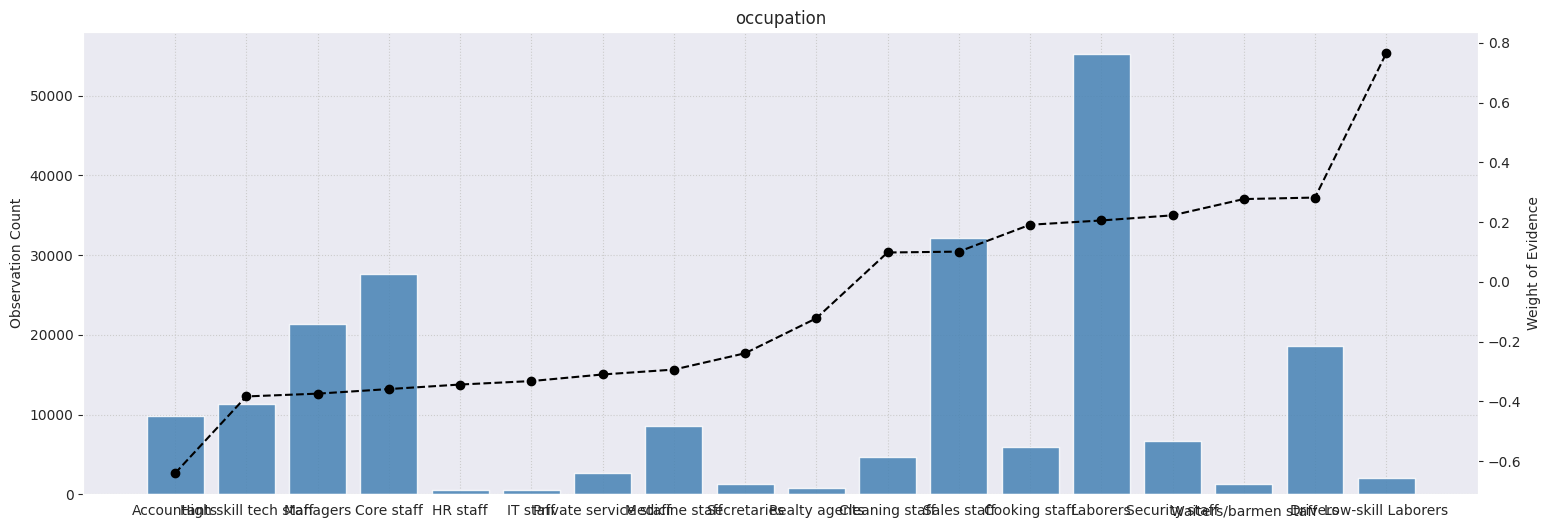

In [52]:
woe_analysis.discrete(column="occupation", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,income_type,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,Businessman,10,0.003252,0.0,0.000000,10.0,100.000000,0.000000,0.003537,-inf,NaN,NaN,inf,inf,True
1,Student,18,0.005853,0.0,0.000000,18.0,100.000000,0.000000,0.006367,-inf,0.000000,NaN,inf,inf,True
2,Pensioner,55362,18.003258,2982.0,5.386366,52380.0,94.613634,12.012085,18.529393,-0.433445,5.386366,inf,inf,0.028249,True
3,State servant,21703,7.057634,1249.0,5.754965,20454.0,94.245035,5.031219,7.235590,-0.363350,0.368599,0.070095,inf,0.008010,True
4,Commercial associate,71617,23.289248,5360.0,7.484257,66257.0,92.515743,21.591138,23.438373,-0.082092,1.729292,0.281258,inf,0.001516,True
5,Working,158774,51.631974,15224.0,9.588472,143550.0,90.411528,61.325277,50.780725,0.188675,2.104215,0.270767,inf,0.019895,True
6,Unemployed,22,0.007154,8.0,36.363636,14.0,63.636364,0.032226,0.004952,1.872870,26.775165,1.684194,inf,0.000511,True
7,Maternity leave,5,0.001626,2.0,40.000000,3.0,60.000000,0.008056,0.001061,2.027020,3.636364,0.154151,inf,0.000142,True


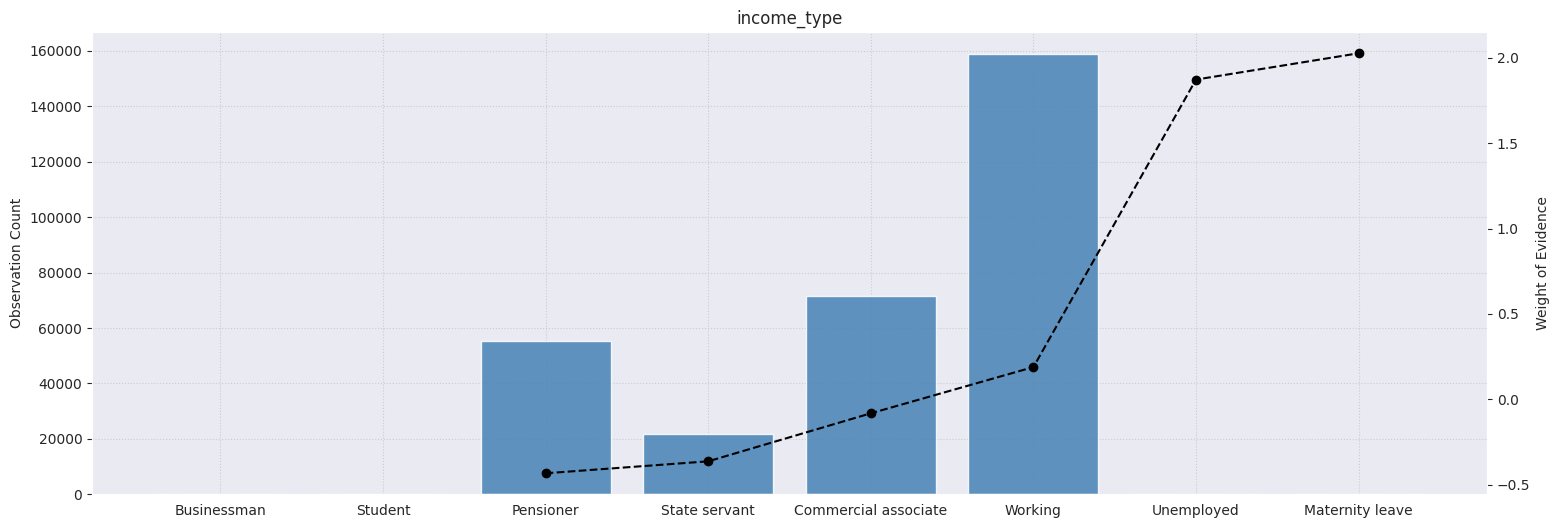

In [53]:
woe_analysis.discrete(column="income_type", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,owns_realty,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,True,213312,69.367275,16983.0,7.961577,196329.0,92.038423,68.410876,69.451264,-0.015093,NaN,NaN,0.000505,0.000157,True
1,False,94199,30.632725,7842.0,8.324929,86357.0,91.675071,31.589124,30.548736,0.033490,0.363352,0.048583,0.000505,0.000348,True


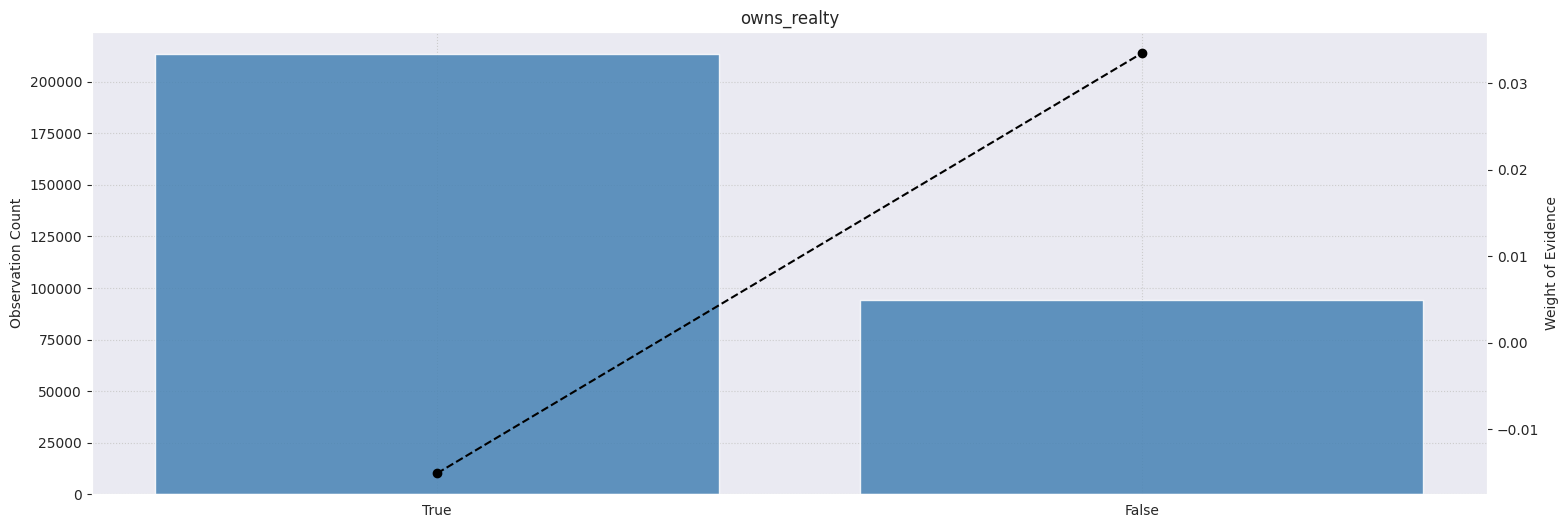

In [54]:
woe_analysis.discrete(column="owns_realty", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,owns_car,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,True,104587,34.010816,7576.0,7.243730,97011.0,92.756270,30.517623,34.317582,-0.117353,NaN,NaN,0.006597,0.004459,True
1,False,202924,65.989184,17249.0,8.500227,185675.0,91.499773,69.482377,65.682418,0.056242,1.256497,0.173595,0.006597,0.002137,True


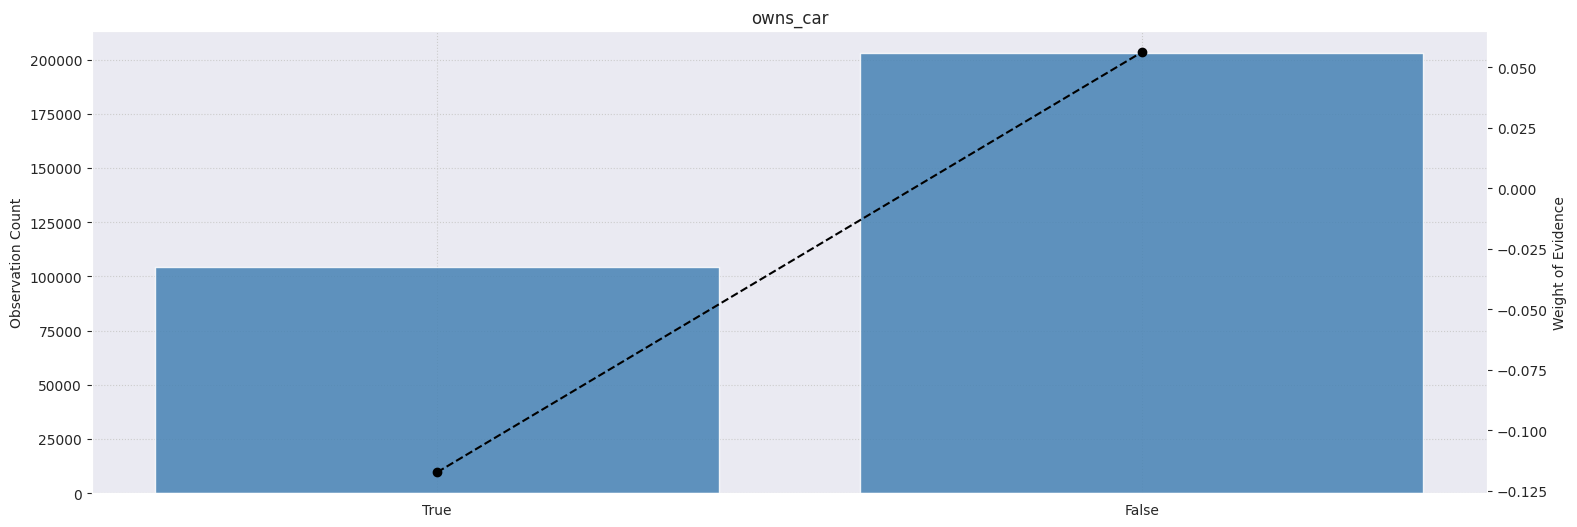

In [55]:
woe_analysis.discrete(column="owns_car", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,have_credit_card,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,Yes,86905,100.0,7534.0,8.669237,79371.0,91.330763,100.0,100.0,0.0,NaN,NaN,0.0,0.0,False


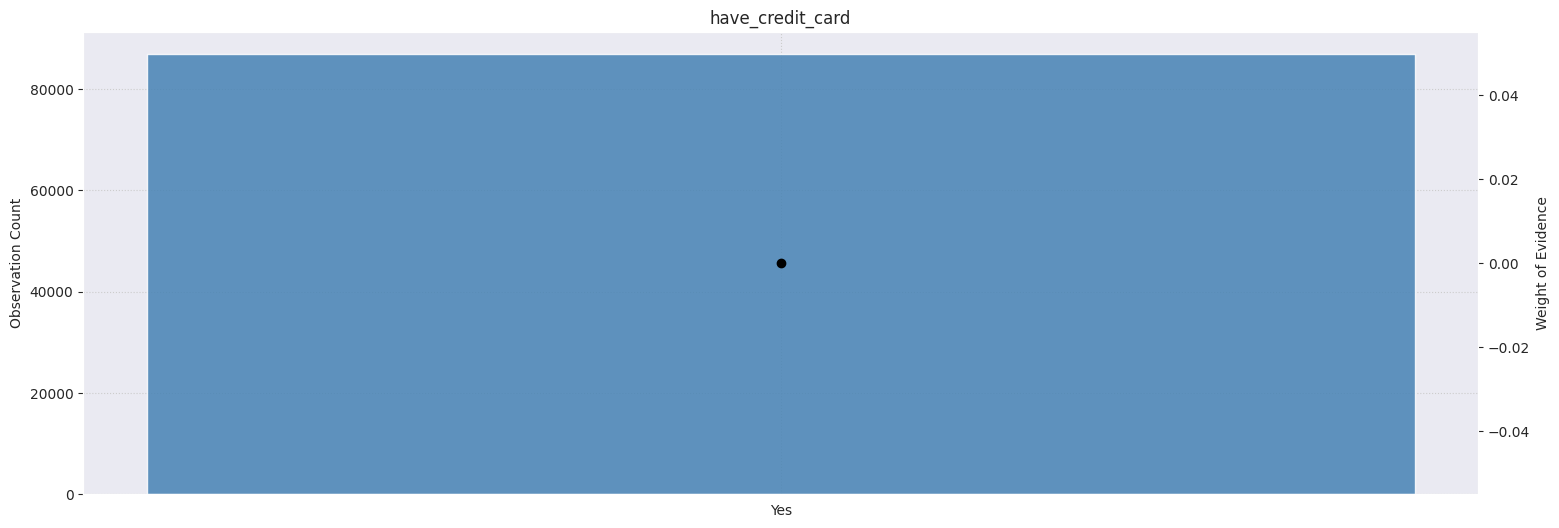

In [56]:
woe_analysis.discrete(column="have_credit_card", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

,organisation_type,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,Trade: type 4,64,0.020812,2.0,3.125000,62.0,96.875000,0.008056,0.021932,-1.001502,NaN,NaN,0.073368,1.389690e-04,True
1,Industry: type 12,369,0.119996,14.0,3.794038,355.0,96.205962,0.056395,0.125581,-0.800575,0.669038,2.009267e-01,0.073368,5.538879e-04,True
2,Transport: type 1,201,0.065364,9.0,4.477612,192.0,95.522388,0.036254,0.067920,-0.627785,0.683574,1.727897e-01,0.073368,1.987951e-04,True
3,Trade: type 6,631,0.205196,29.0,4.595880,602.0,95.404120,0.116818,0.212957,-0.600476,0.118268,2.730918e-02,0.073368,5.772942e-04,True
4,Security Ministries,1974,0.641928,96.0,4.863222,1878.0,95.136778,0.386707,0.664341,-0.541129,0.267342,5.934715e-02,0.073368,1.502360e-03,True
5,University,1327,0.431529,65.0,4.898267,1262.0,95.101733,0.261833,0.446432,-0.533580,0.035045,7.548695e-03,0.073368,9.849833e-04,True
6,Police,2341,0.761274,117.0,4.997864,2224.0,95.002136,0.471299,0.786739,-0.512403,0.099597,2.117705e-02,0.073368,1.616322e-03,True
7,Military,2634,0.856555,135.0,5.125285,2499.0,94.874715,0.543807,0.884020,-0.485886,0.127421,2.651757e-02,0.073368,1.653046e-03,True
8,Bank,2507,0.815255,130.0,5.185481,2377.0,94.814519,0.523666,0.840862,-0.473574,0.060196,1.231114e-02,0.073368,1.502162e-03,True
9,XNA,55374,18.007161,2990.0,5.399646,52384.0,94.600354,12.044310,18.530808,-0.430842,0.214165,4.273220e-02,0.073368,2.794658e-02,True


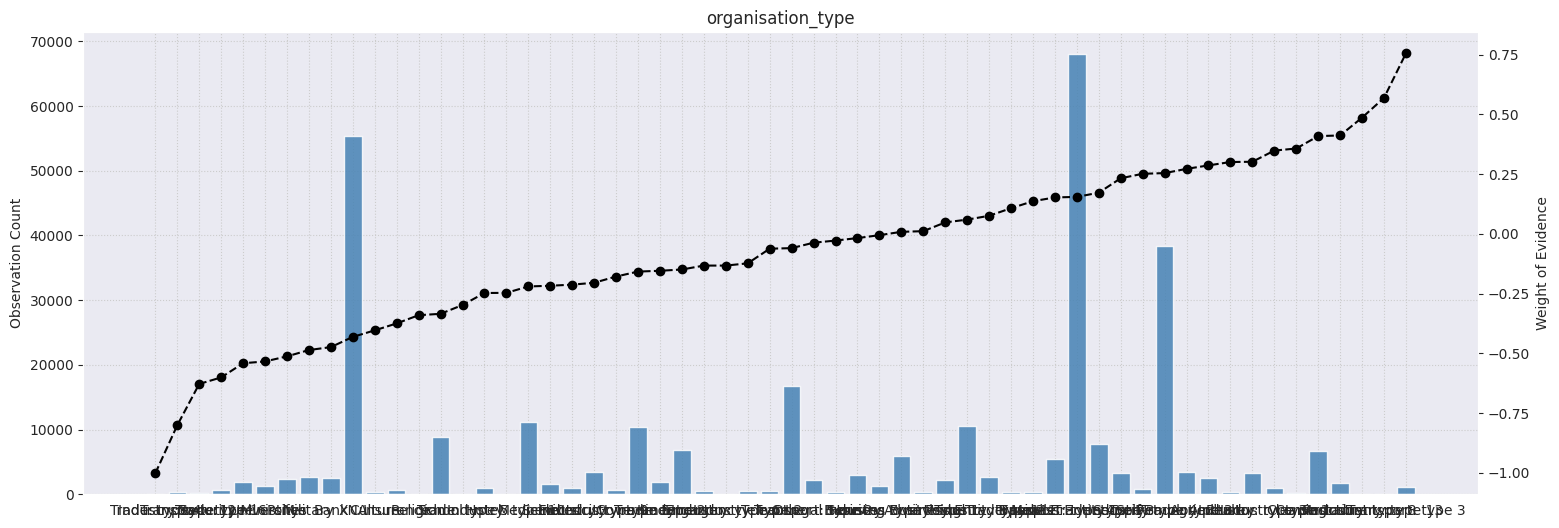

In [57]:
woe_analysis.discrete(column="organisation_type", df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

## Continues Features

,loan_amount_factor,Total,Total Perc,Good,Good Rate,Bad,Bad Rate,Good Dist,Bad Dist,Woe,Good Rate Difference,Woe Difference,IV,PIV,Validation
0,"(65.0, inf]",307511,100.0,24825.0,8.072882,282686.0,91.927118,100.0,100.0,0.0,NaN,NaN,0.0,0.0,True


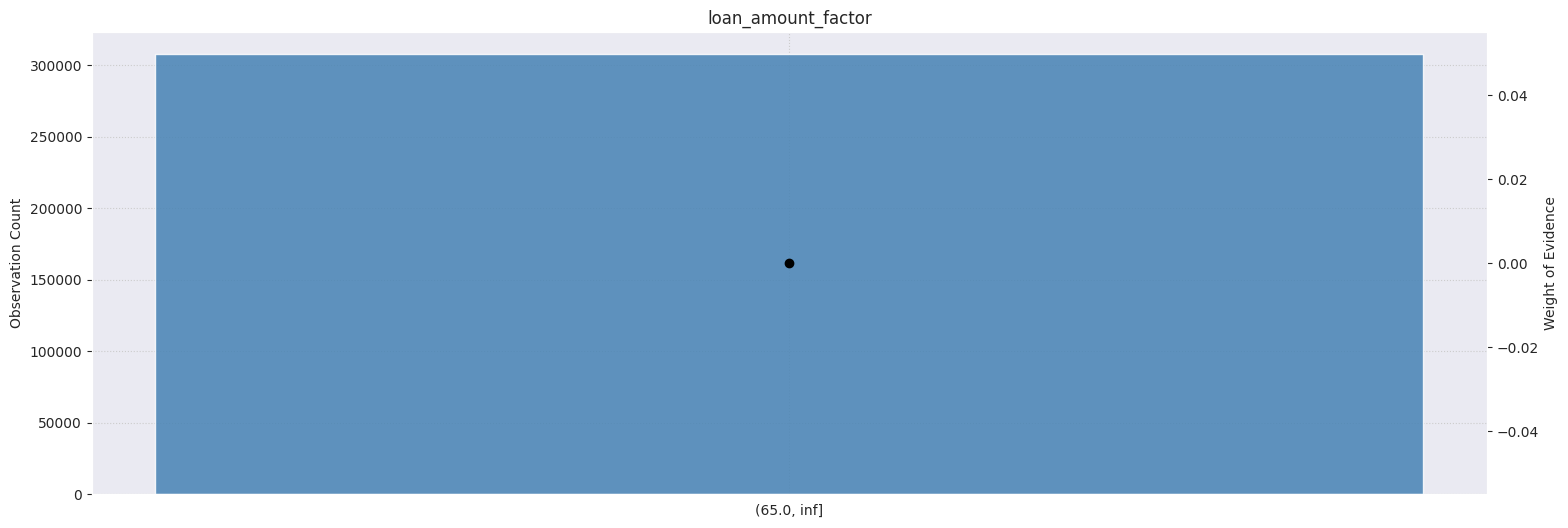

In [63]:
# bins = woe_analysis.auto_binning(column="loan_amount",data=X_train.fillna(-50000), target=y_train, n_bins=10)
bins = pd.IntervalIndex.from_tuples([(17.99, 25), (25, 30), (30, 35), (35, 40),(40, 50),(50, 55),(55, 60),(60, 65),(65, np.inf)])
woe_analysis.continuous(column="loan_amount",bins=bins, df=X_train, target=y_train).plot_data().report(save=False,path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="annuity_amount", data=X_train.fillna(-50000).fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="annuity_amount", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="goods_price", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="goods_price", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="ext_source_score_1", data=X_train.fillna(-50000), target=y_train, n_bins=11)
woe_analysis.continuous(column="ext_source_score_1", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="ext_source_score_2", data=X_train.fillna(-50000), target=y_train, n_bins=15)
woe_analysis.continuous(column="ext_source_score_2", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="ext_source_score_3", data=X_train.fillna(-50000), target=y_train, n_bins=15)
woe_analysis.continuous(column="ext_source_score_3", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="obs_30_social_circle", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="obs_30_social_circle", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="obs_60_social_circle", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="obs_60_social_circle", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="def_30_social_circle", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="def_30_social_circle", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="def_60_social_circle", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="def_60_social_circle", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="complicity_amount", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="complicity_amount", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="complicity_percentage", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="complicity_percentage", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="last_phone_change_days", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="last_phone_change_days", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="sum_overdue_days_Active", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="sum_overdue_days_Active", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
# bins = woe_analysis.auto_binning(column="sum_overdue_days_Bad debt", data=X_train.fillna(-50000), target=y_train, n_bins=10)
# woe_analysis.continuous(column="sum_overdue_days_Bad debt", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
# type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="sum_overdue_days_Closed", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="sum_overdue_days_Closed", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
# bins = woe_analysis.auto_binning(column="sum_overdue_days_Sold", data=X_train.fillna(-50000), target=y_train, n_bins=10)
# woe_analysis.continuous(column="sum_overdue_days_Sold", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
# type=2)

In [ ]:
# bins = woe_analysis.auto_binning(column="sum_overdue_days_Total", data=X_train.fillna(-50000), target=y_train, n_bins=10)
# woe_analysis.continuous(column="sum_overdue_days_Total", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
# type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="max_overdue_days_Active", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="max_overdue_days_Active", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
# bins = woe_analysis.auto_binning(column="max_overdue_days_Bad debt", data=X_train.fillna(-50000), target=y_train, n_bins=10)
# woe_analysis.continuous(column="max_overdue_days_Bad debt", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
# type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="max_overdue_days_Closed", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="max_overdue_days_Closed", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
# bins = woe_analysis.auto_binning(column="max_overdue_days_Sold", data=X_train.fillna(-50000), target=y_train, n_bins=10)
# woe_analysis.continuous(column="max_overdue_days_Sold", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
# type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="max_overdue_days_Total", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="max_overdue_days_Total", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="days_since_first_loan_landed", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="days_since_first_loan_landed", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="days_since_last_loan_landed", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="days_since_last_loan_landed", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="avg_days_between_landing_loans", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="avg_days_between_landing_loans", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="days_since_first_loan_ended", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="days_since_first_loan_ended", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="days_since_last_loan_ended", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="days_since_last_loan_ended", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="Active_loans_count", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Active_loans_count", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="Bad_loans_count", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Bad_loans_count", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="Closed_loans_count", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Closed_loans_count", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="Sold_loans_count", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Sold_loans_count", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="Total_loans_count", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Total_loans_count", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="Another type of loan", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Another type of loan", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="Car loan", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Car loan", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="Cash loan (non-earmarked)", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Cash loan (non-earmarked)", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="Consumer credit", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Consumer credit", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="Credit card", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Credit card", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
# bins = woe_analysis.auto_binning(column="Interbank credit", data=X_train.fillna(-50000), target=y_train, n_bins=10)
# woe_analysis.continuous(column="Interbank credit", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
# type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="Loan for business development", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Loan for business development", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
# bins = woe_analysis.auto_binning(column="Loan for purchase of shares (margin lending)", data=X_train.fillna(-50000), target=y_train, n_bins=10)
# woe_analysis.continuous(column="Loan for purchase of shares (margin lending)", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
# type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="Loan for the purchase of equipment", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Loan for the purchase of equipment", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="Loan for working capital replenishment", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Loan for working capital replenishment", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="Microloan", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Microloan", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
# bins = woe_analysis.auto_binning(column="Mobile operator loan", data=X_train.fillna(-50000), target=y_train, n_bins=10)
# woe_analysis.continuous(column="Mobile operator loan", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
# type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="Mortgage", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Mortgage", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
# bins = woe_analysis.auto_binning(column="Real estate loan", data=X_train.fillna(-50000), target=y_train, n_bins=10)
# woe_analysis.continuous(column="Real estate loan", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
# type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="Unknown type of loan", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Unknown type of loan", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="total_count_x", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_count_x", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="credit_amount_avg", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="credit_amount_avg", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="credit_amount_max", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="credit_amount_max", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="credit_amount_min", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="credit_amount_min", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="debt_amount_avg", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="debt_amount_avg", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="debt_amount_max", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="debt_amount_max", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="debt_amount_min", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="debt_amount_min", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="credit_limit_avg", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="credit_limit_avg", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="credit_limit_max", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="credit_limit_max", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="credit_limit_min", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="credit_limit_min", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="overdue_amount_avg", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="overdue_amount_avg", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="overdue_amount_max", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="overdue_amount_max", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="overdue_amount_min", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="overdue_amount_min", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="annuity_amount_avg", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="annuity_amount_avg", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="annuity_amount_max", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="annuity_amount_max", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="annuity_amount_min", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="annuity_amount_min", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="prolong_count_avg", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="prolong_count_avg", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="prolong_count_max", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="prolong_count_max", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="prolong_count_min", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="prolong_count_min", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="max_overdue_amount_avg", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="max_overdue_amount_avg", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="max_overdue_amount_max", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="max_overdue_amount_max", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="max_overdue_amount_min", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="max_overdue_amount_min", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,
type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="region_population", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="region_population", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)
                           

In [ ]:
bins = woe_analysis.auto_binning(column="Cash loans", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Cash loans", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="Consumer loans", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Consumer loans", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="Revolving loans", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Revolving loans", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="XNA", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="XNA", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="Approved", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Approved", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="Canceled", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Canceled", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="Refused", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Refused", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="Unused offer", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Unused offer", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="total_count_y", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_count_y", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="reject_rate", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="reject_rate", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="Cancel_rate", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Cancel_rate", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="Approve_rate", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="Approve_rate", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="sum_Approved", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="sum_Approved", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="sum_Canceled", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="sum_Canceled", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="sum_Refused", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="sum_Refused", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="sum_Unused offer", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="sum_Unused offer", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="avg_Approved", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="avg_Approved", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="avg_Canceled", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="avg_Canceled", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="avg_Refused", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="avg_Refused", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="avg_Unused offer", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="avg_Unused offer", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="children_count", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="children_count", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="family_members", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="family_members", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="income_total", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="income_total", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="car_age", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="car_age", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="age_days", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="age_days", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="employment_days", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="employment_days", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="registration_days", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="registration_days", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="id_change_days", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="id_change_days", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)
                           

In [ ]:
bins = woe_analysis.auto_binning(column="max_credit_limit_total", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="max_credit_limit_total", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="total_atm_draw_amount_total", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_atm_draw_amount_total", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="total_draw_amount_total", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_draw_amount_total", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="total_other_draw_amount_total", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_other_draw_amount_total", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="total_pos_draw_amount_total", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_pos_draw_amount_total", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="total_atm_draw_count_total", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_atm_draw_count_total", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="total_other_draw_count_total", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_other_draw_count_total", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="total_pos_draw_count_total", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_pos_draw_count_total", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="total_paid_installments_total", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_paid_installments_total", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="max_dpd_total", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="max_dpd_total", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="max_credit_limit_last_12m", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="max_credit_limit_last_12m", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="total_atm_draw_amount_last_12m", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_atm_draw_amount_last_12m", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)


In [ ]:
bins = woe_analysis.auto_binning(column="total_draw_amount_last_12m", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_draw_amount_last_12m", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="total_other_draw_amount_last_12m", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_other_draw_amount_last_12m", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="total_pos_draw_amount_last_12m", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_pos_draw_amount_last_12m", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="total_atm_draw_count_last_12m", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_atm_draw_count_last_12m", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="total_other_draw_count_last_12m", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_other_draw_count_last_12m", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="total_pos_draw_count_last_12m", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_pos_draw_count_last_12m", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="total_paid_installments_last_12m", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_paid_installments_last_12m", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="max_dpd_last_12m", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="max_dpd_last_12m", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="max_credit_limit_last_6m", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="max_credit_limit_last_6m", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="total_atm_draw_amount_last_6m", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_atm_draw_amount_last_6m", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="total_draw_amount_last_6m", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_draw_amount_last_6m", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="total_other_draw_amount_last_6m", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_other_draw_amount_last_6m", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="total_pos_draw_amount_last_6m", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_pos_draw_amount_last_6m", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="total_atm_draw_count_last_6m", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_atm_draw_count_last_6m", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="total_other_draw_count_last_6m", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_other_draw_count_last_6m", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="total_pos_draw_count_last_6m", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_pos_draw_count_last_6m", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="total_paid_installments_last_6m", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="total_paid_installments_last_6m", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="max_dpd_last_6m", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="max_dpd_last_6m", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="sum_future_installments", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="sum_future_installments", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="max_future_installments", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="max_future_installments", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="max_dpd", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="max_dpd", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="max_dpd_tolerance", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="max_dpd_tolerance", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="sum_dpd", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="sum_dpd", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="sum_dpd_tolerance", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="sum_dpd_tolerance", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="apartment_avg", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="apartment_avg", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="basement_area_avg", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="basement_area_avg", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="building_use_start_avg", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="building_use_start_avg", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="building_year_avg", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="building_year_avg", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="common_area_avg", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="common_area_avg", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="elevators_avg", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="elevators_avg", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="entrances_avg", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="entrances_avg", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="land_area_avg", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="land_area_avg", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="living_apartment_avg", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="living_apartment_avg", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="living_area_avg", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="living_area_avg", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="max_floors_avg", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="max_floors_avg", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="min_floors_avg", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="min_floors_avg", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="non_living_apartment_avg", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="non_living_apartment_avg", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
bins = woe_analysis.auto_binning(column="non_living_area_avg", data=X_train.fillna(-50000), target=y_train, n_bins=10)
woe_analysis.continuous(column="non_living_area_avg", bins=bins, df=X_train, target=y_train).report(save=False, path=IV_dir,type=2)

In [ ]:
iv = woe_analysis.IV_excel
iv.to_excel("IV.xlsx")